# Ομάδα 80
*   Στέφανος-Σταμάτης Αχλάτης, 03116149, sachlatis@gmail.com
*   Νικολέτα-Μαρκέλα, Ηλιακοπούλου, 03116111, nmiliakopoulou@gmail.com
*   Γεωργία Σταυροπούλου, 03116162, stavrgeorgia@gmail.com


**Επισυναπτεται PDF αρχείο με την αναφορά**


# Βαθιά μάθηση στο CIFAR-100

## Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import datetime

# Basic imports
import os
import gc
import time
import numpy as np
import pandas as pd
import librosa
import librosa.display
import re
import keras
import random
import zipfile
from imgaug import augmenters as iaa
from math import sqrt, pi, exp
import pickle
import random
import collections
import csv
import ntpath
import functools
import matplotlib
import math
import itertools
import seaborn as sns
from IPython.display import display, HTML
from importlib.machinery import SourceFileLoader

# Sklearn related imports
from sklearn.model_selection import StratifiedKFold, KFold, learning_curve, ShuffleSplit, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error , accuracy_score, confusion_matrix
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report, precision_recall_fscore_support, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_auc_score

# Scipy related imports
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.stats import norm, multivariate_normal
from scipy.signal import butter, deconvolve
from scipy import signal
from scipy.linalg import svd

# Torch related imports
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import make_grid
from torch.nn.utils.rnn import pack_padded_sequence
from torch.utils.data.sampler import SubsetRandomSampler
from torch.nn.utils.rnn import pad_packed_sequence
import torch
from torchvision import transforms, models
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import Dataset

import pywt 
from statsmodels.robust import mad

# Plot related imports 
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numba import jit
from math import log, floor
from sklearn.neighbors import KDTree
from pathlib import Path
from sklearn.utils import shuffle
import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Keras elated imports
from keras import Input, metrics
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.engine import Model
from keras.layers import Conv1D, MaxPooling1D, UpSampling1D
from keras.optimizers import Adadelta, SGD
from keras import backend as K
from keras import optimizers, losses, activations, models
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from keras.layers import Dense, Input, Dropout, Convolution1D, MaxPool1D, GlobalMaxPool1D, GlobalAveragePooling1D, concatenate
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten, Dense
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.metrics import Precision
from keras.metrics import Recall

# keras tuner
! pip install keras-tuner
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Future statement definitions
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from math import ceil

drive.mount('/content/drive')
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 71kB 3.6MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=dbf5bf5a91a96ed18fa374e829bd370a07a6929ae7e80724d7fae7ab4ecbc6b5
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=ae73a9407763b56b4cf149087b7205733e7acb74973ccda93718801f07bcf53b
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables
Mounted at /content/drive


In [2]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)

# select a url for a unique subset of CIFAR-100 with 20, 40, 60, or 80 classes
def select_classes_number(classes_number = 20):
  cifar100_20_classes_url = "https://pastebin.com/raw/nzE1n98V"
  cifar100_40_classes_url = "https://pastebin.com/raw/zGX4mCNP"
  cifar100_60_classes_url = "https://pastebin.com/raw/nsDTd3Qn"
  cifar100_80_classes_url = "https://pastebin.com/raw/SNbXz700"
  if classes_number == 20:
    return cifar100_20_classes_url
  elif classes_number == 40:
    return cifar100_40_classes_url
  elif classes_number == 60:
    return cifar100_60_classes_url
  elif classes_number == 80:
    return cifar100_80_classes_url
  else:
    return -1

In [3]:
# load the entire dataset
(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 11s 0us/step


In [4]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με ένα μοναδικό ξεχωριστό υποσύνολο του CIFAR-100
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό της ομάδας σας.

In [5]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 80

Στο επόμενο κελί μπορείτε να διαλέξετε το πλήθος των κατηγορίων σας: 20 (default), 40, 60 ή 80.

In [6]:
# select the number of classes
cifar100_classes_url = select_classes_number()

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [7]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [8]:
# print our classes
print(our_classes)

[' beaver', ' can', ' cloud', ' cockroach', ' dinosaur', ' dolphin', ' forest', ' house', ' lamp', ' lawn_mower', ' man', ' motorcycle', ' mouse', ' pickup_truck', ' rabbit', ' ray', ' sea', ' snake', ' sweet_pepper', ' wolf']


In [9]:
CLASSES_NUM=len(our_classes)

In [10]:
print(x_train_ds[1].shape)

(32, 32, 3)


1500
Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


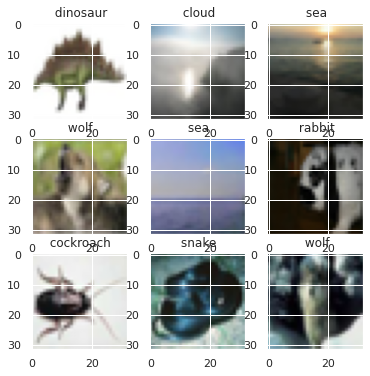

In [11]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

print(len(x_val))

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

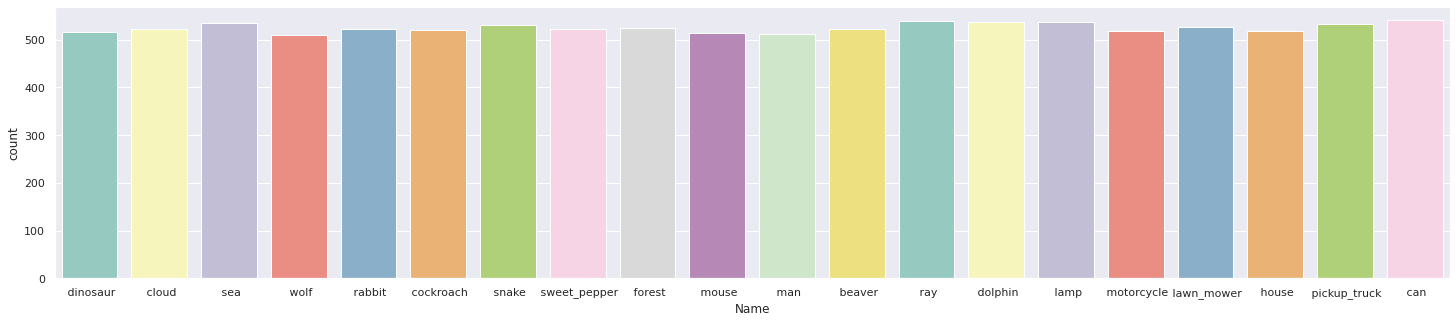

In [12]:
y_labeled_df = pd.DataFrame({"Name" : [class_label_from_index(y) for y in list(y_train[:,0]) + list(y_test[:,0])]})
fig, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot( x = "Name", data = y_labeled_df,palette="Set3" )

#Δημιουγία εικόνων μεγαλύτερων Διαστάσεων

In [26]:
def _bytes_feature(value):
    # If the value is an eager tensor BytesList won't unpack a string from an EagerTensor.
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy() 
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [27]:
def serialize_example(image, label, image_shape):
    feature = {
        "image": _bytes_feature(image),
        "label": _int64_feature(label),
        'height': _int64_feature(image_shape[0]),
        'width': _int64_feature(image_shape[1]),
        'depth': _int64_feature(image_shape[2]),
    }

    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()

In [28]:
def write_TFR(tfrecord_dir, x, y):
  with tf.io.TFRecordWriter(tfrecord_dir) as writer:
      for img_array, label in zip(x, y):
                
          img_array = tf.image.resize(img_array, (TARGET_SIZE[0], TARGET_SIZE[1])) 
          img_bytes = tf.io.serialize_tensor(img_array)
          image_shape = img_array.shape
          example = serialize_example(img_bytes, label, image_shape)
          writer.write(example)
  return None

In [29]:
def _parse_function(example_proto):
    feature_description = {
        'image': tf.io.FixedLenFeature([], tf.string),
        'label': tf.io.FixedLenFeature([], tf.int64),
        'height': tf.io.FixedLenFeature([], tf.int64),
        'width': tf.io.FixedLenFeature([], tf.int64),
        'depth': tf.io.FixedLenFeature([], tf.int64)
    }
    example = tf.io.parse_single_example(example_proto, feature_description)

    label = example["label"]
    image_shape = TARGET_SIZE

    image = tf.io.parse_tensor(example["image"], float)
    image = tf.reshape(image, image_shape)


    return  image , [label]

In [30]:
def read_dataset(file):
    dataset = tf.data.TFRecordDataset(file)
    return dataset.map(_parse_function)

## 74 dim img

In [31]:
TARGET_SIZE = (74,74,3)

In [32]:
dir_74dim_img = "/content/drive/My Drive/Neural_Networks/lab3/dir_74dim_img/"

In [104]:
write_TFR(dir_74dim_img + "train_74dim", x_train, y_train)
write_TFR(dir_74dim_img + "val_74dim", x_val, y_val)
write_TFR(dir_74dim_img + "test_74dim", x_test, y_test)

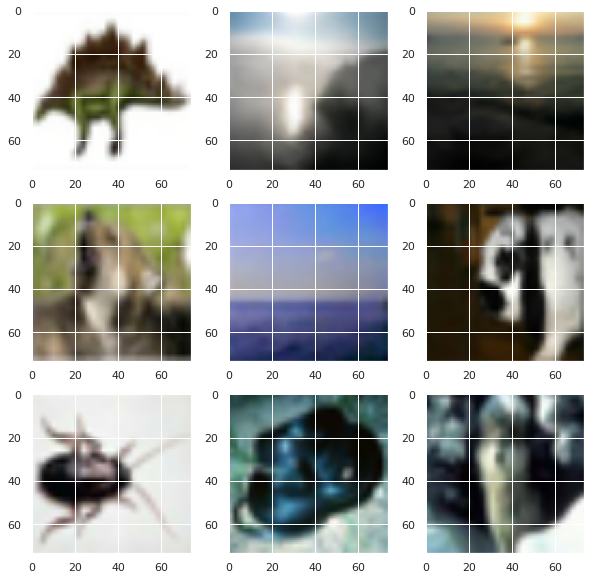

In [105]:
train_ds_74 = read_dataset(dir_74dim_img + "train_74dim")
validation_ds_74 = read_dataset(dir_74dim_img + "val_74dim")
test_ds_74 = read_dataset(dir_74dim_img + "test_74dim")

plt.figure(figsize=(10,10))
for i, data in enumerate(train_ds_74.take(9)):
    img = tf.keras.preprocessing.image.array_to_img(data[0])
    plt.subplot(3,3,i+1)
    plt.imshow(img)
plt.show()

# Συναρτήσεις εκπαίδευσης

Θα χρησιμοποιήσουμε την ιδιότητα data prefetch του tf2:

In [13]:
# we user prefetch https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch 
# see also AUTOTUNE
# the dataset is now "infinite"

BATCH_SIZE = 128
AUTOTUNE = tf.data.experimental.AUTOTUNE # https://www.tensorflow.org/guide/data_performance
LABEL  = sorted(list(set([y for y in list(y_train[:,0]) + list(y_test[:,0])])))
LABEL_DICT = {LABEL[i] : i for i in range(len(LABEL))}

def _input_fn(x,y, BATCH_SIZE):
  ds = tf.data.Dataset.from_tensor_slices((x,y))
  ds = ds.shuffle(buffer_size=data_size)
  ds = ds.repeat()
  ds = ds.batch(BATCH_SIZE)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

def _input_fn_for_bigger_images(ds, BATCH_SIZE):
  ds = ds.shuffle(buffer_size=data_size)
  ds = ds.repeat()
  #ds = ds.cache()
  ds = ds.batch(BATCH_SIZE)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

def map_label(l):
  l = [ [ LABEL_DICT[i[0]] ]  for i in l]
  return np.array(l)

train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object
augment = False #Data augmentation
# steps_per_epoch and validation_steps for training and validation: https://www.tensorflow.org/guide/keras/train_and_evaluate

def train_model(model,name,early_stopping, epochs = 10, steps_per_epoch = 2, verbose=2 , validation_steps = 1):
  
  dir = os.path.join('/content/drive/My Drive/Neural_Networks/lab3/models', name)
  
  if (early_stopping==1):
    tensorboard_callback = tf.keras.callbacks.TensorBoard(dir, histogram_freq=1)
    early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True) 
    history = model.fit(train_ds, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps, callbacks=[tensorboard_callback, early_stopping_callback])
  else:
    history = model.fit(train_ds, epochs=epochs, verbose=2, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps)
  return(history)

## Γραφικές παραστάσεις εκπαίδευσης και απόδοση στο σύνολο ελέγχου

In [14]:
def precision(y_true, y_pred): #taken from old keras source code
     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
     precision = true_positives / (predicted_positives + K.epsilon())
     return precision
def recall(y_true, y_pred): #taken from old keras source code
     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
     recall = true_positives / (possible_positives + K.epsilon())
     return recall

In [15]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
  fig, axs = plt.subplots(2, 1, figsize=(8, 8))
  axs[0].set_title('Cross Entropy Loss')
  axs[0].plot(history.history['loss'], color='blue', label='train')
  axs[0].plot(history.history['val_loss'], color='orange', label='val')
  axs[0].legend(loc='best')
  axs[1].set_title('Classification Accuracy')
  axs[1].plot(history.history['accuracy'], color='blue', label='train')
  axs[1].plot(history.history['val_accuracy'], color='orange', label='val')
  axs[1].legend(loc='best')
  #axs[2].set_title('Classification Precision')
  #axs[2].plot(history.history['precision'], color='blue', label='train')
  #axs[2].plot(history.history['val_precision'], color='orange', label='val')
  #axs[2].legend(loc='best')
  #axs[3].set_title('Classification Recall')
  #axs[3].plot(history.history['recall'], color='blue', label='train')
  #axs[3].plot(history.history['recall'], color='orange', label='val')
  #axs[3].legend(loc='best')
  plt.tight_layout()
  return plt
 
# print test set evaluation metrics
def model_evaluation(model, evaluation_steps=10):
  print('\nTest set evaluation metrics')
  #loss0,accuracy0,precision0,recall0 = model.evaluate(test_ds, steps = evaluation_steps)
  loss0,accuracy0 = model.evaluate(test_ds, steps = evaluation_steps)
  print("Loss: {:.2f}".format(loss0))
  print("Accuracy: {:.2f}".format(accuracy0))
  #print("Precision: {:.2f}".format(precision0))
  #print("Recall: {:.2f}".format(recall0))

def model_report(model, history, evaluation_steps = 10):
	plt = summarize_diagnostics(history)
	plt.show()
	model_evaluation(model, evaluation_steps)

## Περισσότερες Λειτουγικότητες

In [16]:
def color(x,y):
    """Color augmentation
    Args:
        x: Image

    Returns:
        Augmented image
    """
    x = tf.image.random_hue(x, 0.08)
    x = tf.image.random_saturation(x, 0.6, 1.6)
    x = tf.image.random_brightness(x, 0.05)
    x = tf.image.random_contrast(x, 0.7, 1.3)
    return tf.clip_by_value(x, 0, 1),y

def crop(x,y,dim_input=32):
    """Crop augmentation
    Args:
        x: Image

    Returns:
        Augmented image
    """
    x = tf.image.resize_with_crop_or_pad(
        x, dim_input + 8,dim_input+ 8)
    x = tf.image.random_crop(x, [dim_input, dim_input, 3])
    return x,y


def flip(x,y):
    """Flip augmentation

    Args:
        x: Image

    Returns:
        Augmented image
    """
    x = tf.image.random_flip_left_right(x)
    return tf.clip_by_value(x, 0, 1),y
augment=True

## Μοντέλα δικτύων

# Ένα μικρό συνελικτικό δίκτυο "from scratch"

In [19]:
train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object
augment = False #Data augmentation

In [20]:
# a simple CNN https://www.tensorflow.org/tutorials/images/cnn
def init_zero_model(summary,input,optimizer):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(input,input,3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(100, activation='softmax'))

  model.compile(optimizer=optimizer, loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

  init_zero_model(True,32,tf.optimizers.Adam(learning_rate=0.0001))

In [26]:
%%time
zero_model = init_zero_model(True,32,tf.optimizers.Adam(learning_rate=0.0001))
zero_model_history = train_model(zero_model,"zero_model_1",False, 60, 40, 10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

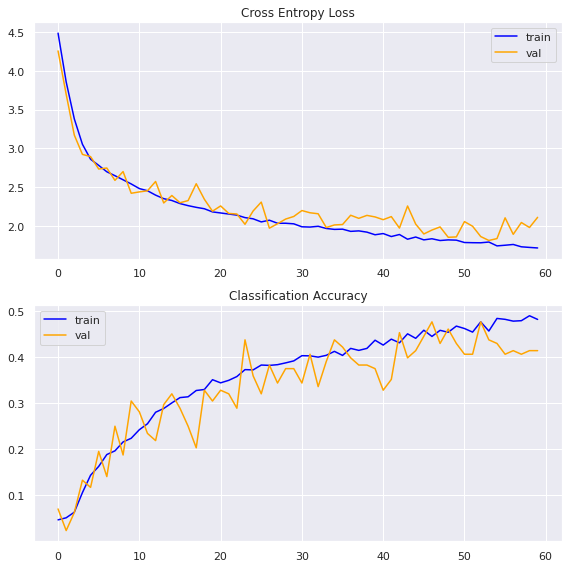


Test set evaluation metrics
10/10 [==============================] - 0s 5ms/step - loss: 1.8515 - accuracy: 0.4523
Loss: 1.85
Accuracy: 0.45


In [27]:
model_report(zero_model,zero_model_history)
zero_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/zero_model_32.h5')

# Δικά Μας μοντέλα

## Πρώτο Μοντέλο

In [168]:
train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object
augment = False #Data augmentation

In [23]:
def init_first_model(summary,input,optimizer):
  
  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(input,input,3)))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.BatchNormalization(axis=-1,scale=False))
  model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(100, activation='softmax'))
  
  model.compile(optimizer=optimizer, loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [49]:
%%time
first_model = init_first_model(True,32,tf.optimizers.Adam(learning_rate=0.0001))
first_model_history = train_model(first_model,"first_model_1",False, 60, 40, 10)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 15, 15, 32)        96        
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 2, 2, 128)        

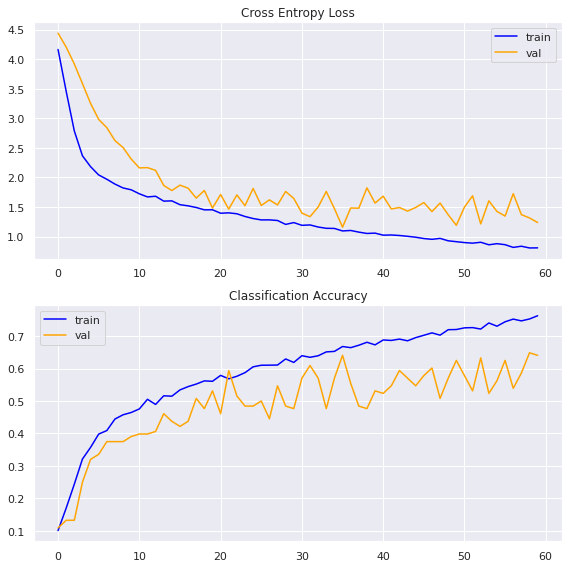


Test set evaluation metrics
10/10 [==============================] - 0s 4ms/step - loss: 1.4276 - accuracy: 0.5797
Loss: 1.43
Accuracy: 0.58


In [50]:
model_report(first_model,first_model_history)
first_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/first_model_32.h5')

In [170]:
%%time
first_model = init_first_model(True,32,tf.keras.optimizers.Nadam( learning_rate=0.001 ))
first_model_history = train_model(first_model,"first_model_1",False, 60, 40, 10)


Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_108 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_100 (MaxPoolin (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_41 (Batc (None, 15, 15, 32)        96        
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_101 (MaxPoolin (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_102 (MaxPoolin (None, 2, 2, 128)       

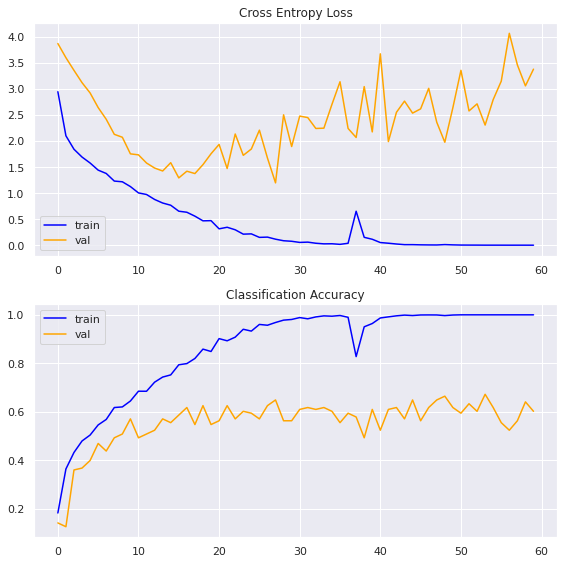


Test set evaluation metrics
10/10 [==============================] - 0s 5ms/step - loss: 2.6287 - accuracy: 0.6383
Loss: 2.63
Accuracy: 0.64


In [171]:
model_report(first_model,first_model_history)
first_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/first_model_32.h5')

## Second Mine

In [173]:
train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object
augment = False #Data augmentation

In [174]:
def init_second_model(summary,input,optimizer):
  
  model = models.Sequential()
  model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(input,input,3)))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.BatchNormalization(axis=-1,scale=False))
  model.add(layers.Conv2D(128, kernel_size=(2, 2), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(rate=0.4))
  model.add(layers.Conv2D(256, kernel_size=(2, 2), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(rate=0.4))
  model.add(layers.Conv2D(512, kernel_size=(2, 2), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(rate=0.4))
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(100, activation='softmax'))
  
  model.compile(optimizer=optimizer, loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [176]:
%%time
second_model = init_second_model(True,32,tf.optimizers.Adam(learning_rate=0.0001))
second_model_history = train_model(second_model,"second_model_1",False, 60, 40, 10)

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_111 (Conv2D)          (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_103 (MaxPoolin (None, 15, 15, 64)        0         
_________________________________________________________________
batch_normalization_42 (Batc (None, 15, 15, 64)        192       
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 14, 14, 128)       32896     
_________________________________________________________________
max_pooling2d_104 (MaxPoolin (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 6, 6, 256)       

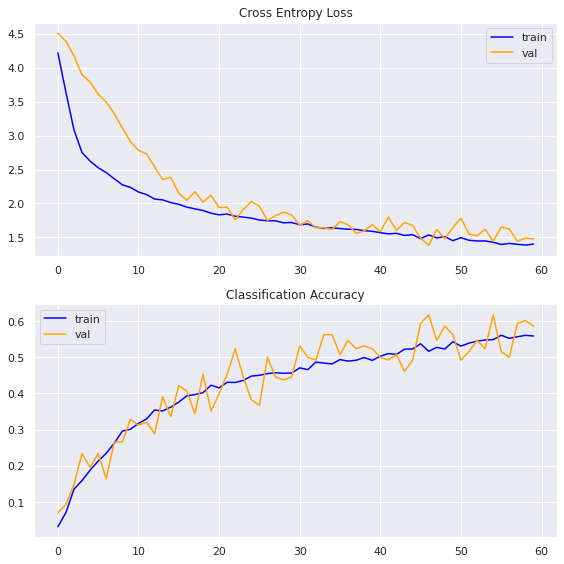


Test set evaluation metrics
10/10 [==============================] - 0s 5ms/step - loss: 1.4451 - accuracy: 0.5711
Loss: 1.45
Accuracy: 0.57


In [177]:
model_report(second_model,second_model_history)
second_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/second_model_32.h5')

In [178]:
%%time
second_model = init_second_model(True,32,tf.keras.optimizers.Nadam( learning_rate=0.001 ))
second_model_history = train_model(second_model,"second_model_1",False, 60, 40, 10)

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_115 (Conv2D)          (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_107 (MaxPoolin (None, 15, 15, 64)        0         
_________________________________________________________________
batch_normalization_43 (Batc (None, 15, 15, 64)        192       
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 14, 14, 128)       32896     
_________________________________________________________________
max_pooling2d_108 (MaxPoolin (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 6, 6, 256)       

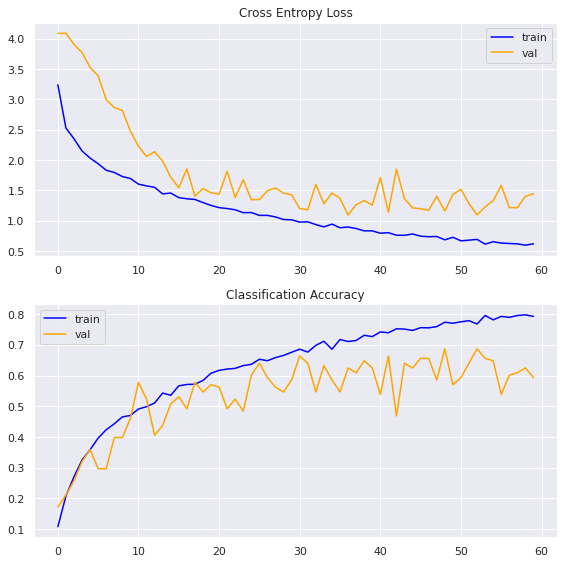


Test set evaluation metrics
10/10 [==============================] - 0s 6ms/step - loss: 1.3929 - accuracy: 0.6227
Loss: 1.39
Accuracy: 0.62


In [179]:
model_report(second_model,second_model_history)
second_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/second_model_32.h5')

## Third Model

In [180]:
train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object
augment = False #Data augmentation

In [181]:
def init_third_model(summary,input,optimizer):
  
  model = models.Sequential()
  model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(input,input,3)))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(rate=0.4))
  model.add(layers.BatchNormalization(axis=-1,scale=False))

  model.add(layers.Conv2D(512, kernel_size=(2, 2), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(rate=0.4))
  model.add(layers.BatchNormalization(axis=-1,scale=False))


  model.add(layers.Conv2D(1024, kernel_size=(2, 2), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(rate=0.4))
  model.add(layers.BatchNormalization(axis=-1,scale=False))

  model.add(layers.Conv2D(512, kernel_size=(2, 2), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(rate=0.4))
  model.add(layers.BatchNormalization(axis=-1,scale=False))
  
  model.add(layers.Flatten())
  model.add(layers.Dense(2048, activation='relu'))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(100, activation='softmax'))
  
  model.compile(optimizer=optimizer, loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [58]:
%%time
third_model = init_third_model(True,32,tf.optimizers.Adam(learning_rate=0.0001))
third_model_history = train_model(third_model,"third_model_1",False, 100, 40, 10)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 15, 15, 128)       0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 15, 15, 128)       384       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 14, 14, 512)       262656    
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 7, 7, 512)         0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 7, 7, 512)       

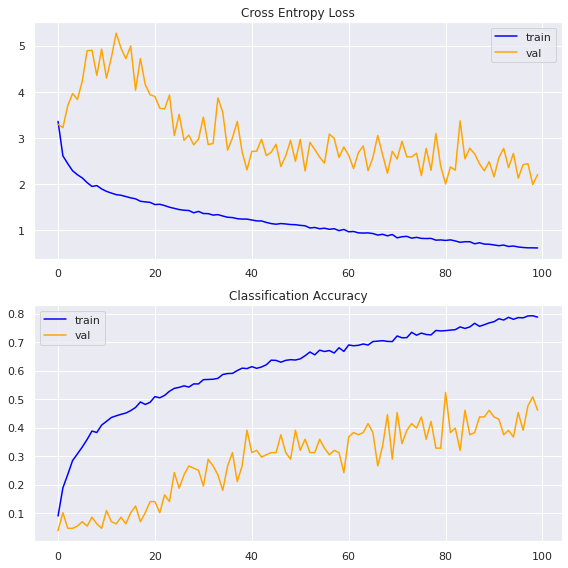


Test set evaluation metrics
10/10 [==============================] - 0s 15ms/step - loss: 2.1675 - accuracy: 0.4672
Loss: 2.17
Accuracy: 0.47


In [59]:
model_report(third_model,third_model_history)
third_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/third_model_32.h5')

In [182]:
%%time
third_model = init_third_model(True,32,tf.keras.optimizers.Nadam( learning_rate=0.001 ))
third_model_history = train_model(third_model,"third_model_1",False, 100, 40, 10)

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_119 (Conv2D)          (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_111 (MaxPoolin (None, 15, 15, 128)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 15, 15, 128)       0         
_________________________________________________________________
batch_normalization_44 (Batc (None, 15, 15, 128)       384       
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 14, 14, 512)       262656    
_________________________________________________________________
max_pooling2d_112 (MaxPoolin (None, 7, 7, 512)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 7, 512)       

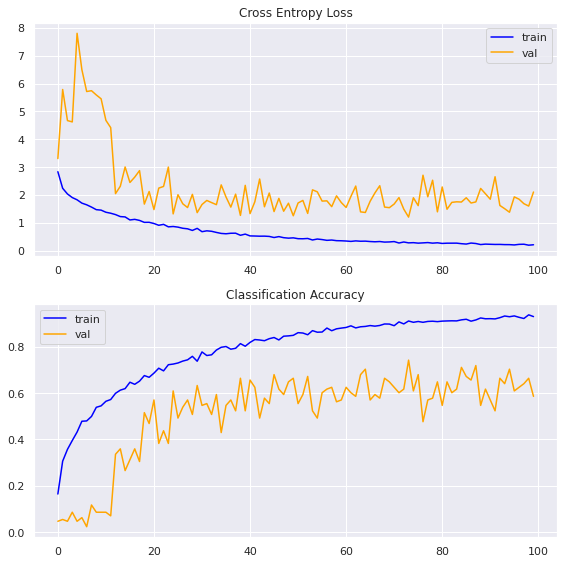


Test set evaluation metrics
10/10 [==============================] - 0s 16ms/step - loss: 2.4420 - accuracy: 0.5688
Loss: 2.44
Accuracy: 0.57


In [183]:
model_report(third_model,third_model_history)
third_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/third_model_32.h5')

## Forth

In [184]:
train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object
augment = False #Data augmentation

In [185]:
def init_fourth_model(summary,input,optimizer):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (5, 5),padding='valid',activation='relu', input_shape=(input, input, 3)))
  model.add(layers.Conv2D(64, (5, 5),padding='valid',activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(rate=0.25))
  model.add(layers.Conv2D(64, (3, 3),padding='valid',activation='relu'))
  model.add(layers.Conv2D(64, (3, 3),padding='valid',activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(rate=0.4))  
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dropout(rate=0.4))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dropout(rate=0.4))
  model.add(layers.Dense(100, activation='softmax'))
  
  model.compile(optimizer=optimizer, loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [186]:
%%time
forth_model = init_fourth_model(True,32,tf.keras.optimizers.Nadam( learning_rate=0.001 ))
forth_model_history = train_model(forth_model,"forth_model_1",False, 60, 40, 10)

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_123 (Conv2D)          (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 24, 24, 64)        51264     
_________________________________________________________________
max_pooling2d_115 (MaxPoolin (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_116 (MaxPoolin (None, 4, 4, 64)        

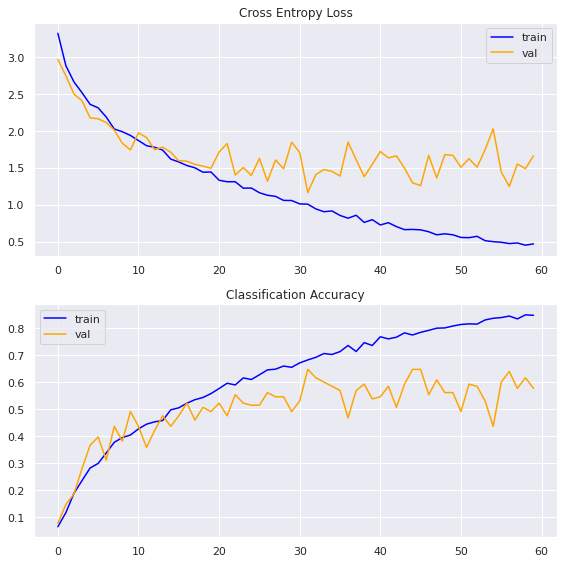


Test set evaluation metrics
10/10 [==============================] - 0s 6ms/step - loss: 1.6006 - accuracy: 0.6008
Loss: 1.60
Accuracy: 0.60


In [187]:
model_report(forth_model,forth_model_history)
forth_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/forth_model_32.h5')

In [64]:
%%time
forth_model = init_fourth_model(True,32,tf.optimizers.Adam(learning_rate=0.0001))
forth_model_history = train_model(forth_model,"forth_model_1",False, 60, 40, 10)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 24, 24, 64)        51264     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 4, 4, 64)        

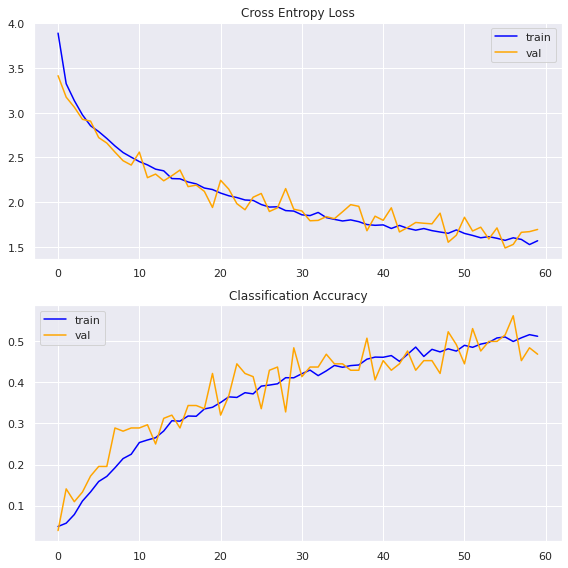


Test set evaluation metrics
10/10 [==============================] - 0s 5ms/step - loss: 1.5353 - accuracy: 0.5211
Loss: 1.54
Accuracy: 0.52


In [65]:
model_report(forth_model,forth_model_history)
forth_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/forth_model_32.h5')

#Βελτιστοποίηση Του καλύτερου μοντέλου (First)

## Μελέτη Πλήθους κλάσεων

In [38]:
cifar100_classes_url = select_classes_number(80)

team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

print(our_classes)

[' aquarium_fish', ' bed', ' bee', ' beetle', ' bicycle', ' bottle', ' bowl', ' boy', ' bridge', ' bus', ' butterfly', ' camel', ' can', ' castle', ' caterpillar', ' chair', ' chimpanzee', ' clock', ' cloud', ' crab', ' crocodile', ' dinosaur', ' dolphin', ' elephant', ' flatfish', ' fox', ' girl', ' hamster', ' house', ' kangaroo', ' keyboard', ' lawn_mower', ' lion', ' lizard', ' lobster', ' man', ' maple_tree', ' motorcycle', ' mountain', ' mushroom', ' oak_tree', ' orange', ' orchid', ' otter', ' palm_tree', ' pear', ' pickup_truck', ' pine_tree', ' plain', ' poppy', ' porcupine', ' rabbit', ' raccoon', ' ray', ' road', ' rose', ' sea', ' shark', ' shrew', ' skunk', ' snail', ' snake', ' spider', ' squirrel', ' streetcar', ' sunflower', ' sweet_pepper', ' table', ' tank', ' telephone', ' television', ' tiger', ' tractor', ' trout', ' tulip', ' turtle', ' whale', ' willow_tree', ' wolf', ' worm']


6000
Train: X=(34000, 32, 32, 3), y=(34000, 1)
Validation: X=(6000, 32, 32, 3), y=(6000, 1)
Test: X=(8000, 32, 32, 3), y=(8000, 1)


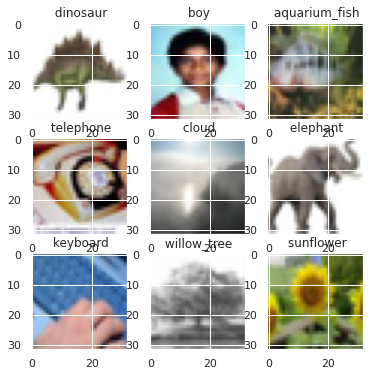

In [39]:

# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

print(len(x_val))

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

In [40]:
BATCH_SIZE =128
train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object


def train_model(model,name,early_stopping, epochs = 10, steps_per_epoch = 2, verbose=2 , validation_steps = 1):
  
  dir = os.path.join('/content/drive/My Drive/Neural_Networks/lab3/models', name)
  
  if (early_stopping==1):
    tensorboard_callback = tf.keras.callbacks.TensorBoard(dir, histogram_freq=1)
    early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True) 
    history = model.fit(train_ds, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps, callbacks=[tensorboard_callback, early_stopping_callback])
  else:
    history = model.fit(train_ds, epochs=epochs, verbose=2, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps)
  return(history)
  
# print test set evaluation metrics
def model_evaluation(model, evaluation_steps=10):
  print('\nTest set evaluation metrics')
  #loss0,accuracy0,precision0,recall0 = model.evaluate(test_ds, steps = evaluation_steps)
  loss0,accuracy0 = model.evaluate(test_ds, steps = evaluation_steps)
  print("Loss: {:.2f}".format(loss0))
  print("Accuracy: {:.2f}".format(accuracy0))
  #print("Precision: {:.2f}".format(precision0))
  #print("Recall: {:.2f}".format(recall0))

def model_report(model, history, evaluation_steps = 10):
	plt = summarize_diagnostics(history)
	plt.show()
	model_evaluation(model, evaluation_steps)

In [41]:
%%time
first_model = init_first_model(True,32,tf.keras.optimizers.Nadam( learning_rate=0.001 ))
first_model_history = train_model(first_model,"first_model_1",True, 200, 40, 10)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 15, 15, 32)        96        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 2, 2, 128)        

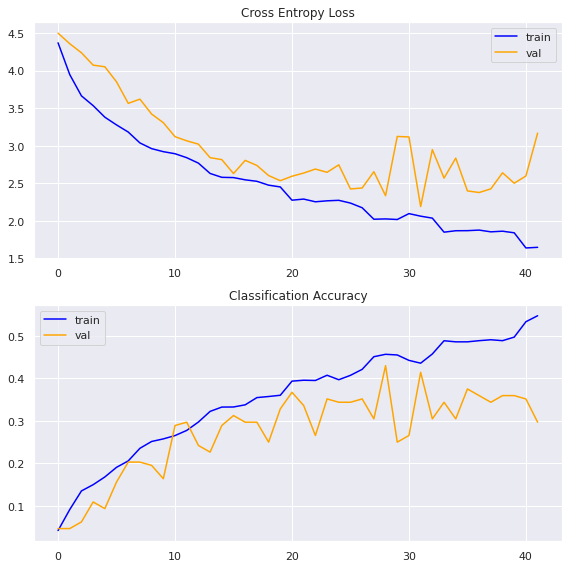


Test set evaluation metrics
10/10 [==============================] - 0s 7ms/step - loss: 2.4401 - accuracy: 0.3680
Loss: 2.44
Accuracy: 0.37


In [42]:
model_report(first_model,first_model_history)
first_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/first_model_32.h5')

## Μελέτη Batch Size

In [46]:
BATCH_SIZE =32
train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object


def train_model(model,name,early_stopping, epochs = 10, steps_per_epoch = 2, verbose=2 , validation_steps = 1):
  
  dir = os.path.join('/content/drive/My Drive/Neural_Networks/lab3/models', name)
  
  if (early_stopping==1):
    tensorboard_callback = tf.keras.callbacks.TensorBoard(dir, histogram_freq=1)
    early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True) 
    history = model.fit(train_ds, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps, callbacks=[tensorboard_callback, early_stopping_callback])
  else:
    history = model.fit(train_ds, epochs=epochs, verbose=2, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps)
  return(history)
  
# print test set evaluation metrics
def model_evaluation(model, evaluation_steps=10):
  print('\nTest set evaluation metrics')
  #loss0,accuracy0,precision0,recall0 = model.evaluate(test_ds, steps = evaluation_steps)
  loss0,accuracy0 = model.evaluate(test_ds, steps = evaluation_steps)
  print("Loss: {:.2f}".format(loss0))
  print("Accuracy: {:.2f}".format(accuracy0))
  #print("Precision: {:.2f}".format(precision0))
  #print("Recall: {:.2f}".format(recall0))

def model_report(model, history, evaluation_steps = 10):
	plt = summarize_diagnostics(history)
	plt.show()
	model_evaluation(model, evaluation_steps)

In [78]:
%%time
first_model = init_first_model(True,32,tf.optimizers.Adam(learning_rate=0.0001))
first_model_history = train_model(first_model,"first_model_1",True, 200, 40, 10)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 15, 15, 32)        96        
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 2, 2, 128)        

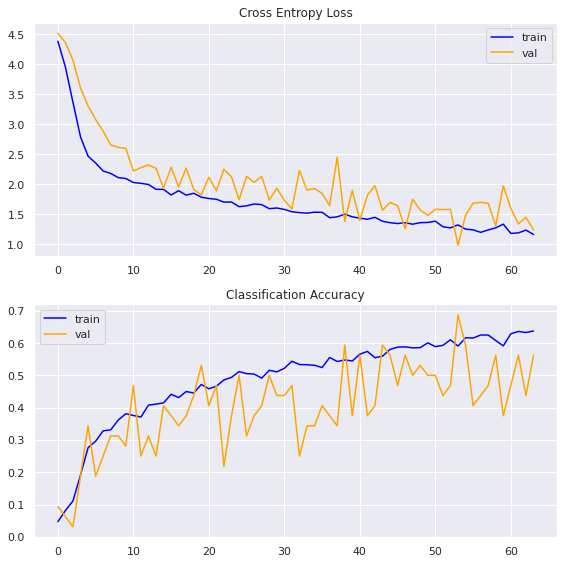


Test set evaluation metrics
10/10 [==============================] - 0s 3ms/step - loss: 1.4678 - accuracy: 0.5562
Loss: 1.47
Accuracy: 0.56


In [80]:
model_report(first_model,first_model_history)
first_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/first_model_32.h5')

In [54]:
BATCH_SIZE = 64
train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object


def train_model(model,name,early_stopping, epochs = 10, steps_per_epoch = 2, verbose=2 , validation_steps = 1):
  
  dir = os.path.join('/content/drive/My Drive/Neural_Networks/lab3/models', name)
  
  if (early_stopping==1):
    tensorboard_callback = tf.keras.callbacks.TensorBoard(dir, histogram_freq=1)
    early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True) 
    history = model.fit(train_ds, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps, callbacks=[tensorboard_callback, early_stopping_callback])
  else:
    history = model.fit(train_ds, epochs=epochs, verbose=2, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps)
  return(history)

# print test set evaluation metrics
def model_evaluation(model, evaluation_steps=10):
  print('\nTest set evaluation metrics')
  loss0,accuracy0 = model.evaluate(test_ds, steps = evaluation_steps)
  print("Loss: {:.2f}".format(loss0))
  print("Accuracy: {:.2f}".format(accuracy0))

def model_report(model, history, evaluation_steps = 10):
	plt = summarize_diagnostics(history)
	plt.show()
	model_evaluation(model, evaluation_steps)

In [55]:
%%time
first_model = init_first_model(True,32,tf.optimizers.Adam(learning_rate=0.0001))
first_model_history = train_model(first_model,"first_model_1",True, 200, 40, 10)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 15, 15, 32)        96        
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 2, 2, 128)        

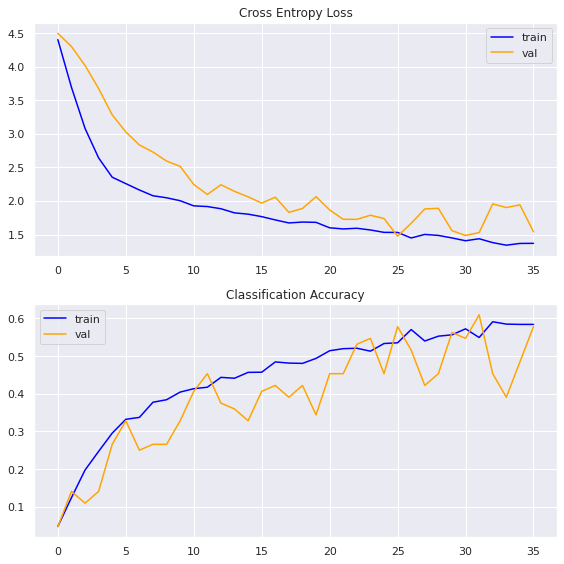


Test set evaluation metrics
10/10 [==============================] - 0s 3ms/step - loss: 1.7126 - accuracy: 0.4750
Loss: 1.71
Accuracy: 0.47


In [56]:
model_report(first_model,first_model_history)
first_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/first_model_32.h5')

In [63]:
BATCH_SIZE = 128
train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object


def train_model(model,name,early_stopping, epochs = 10, steps_per_epoch = 2, verbose=2 , validation_steps = 1):
  
  dir = os.path.join('/content/drive/My Drive/Neural_Networks/lab3/models', name)
  
  if (early_stopping==1):
    tensorboard_callback = tf.keras.callbacks.TensorBoard(dir, histogram_freq=1)
    early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True) 
    history = model.fit(train_ds, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps, callbacks=[tensorboard_callback, early_stopping_callback])
  else:
    history = model.fit(train_ds, epochs=epochs, verbose=2, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps)
  return(history)

# print test set evaluation metrics
def model_evaluation(model, evaluation_steps=10):
  print('\nTest set evaluation metrics')
  loss0,accuracy0 = model.evaluate(test_ds, steps = evaluation_steps)
  print("Loss: {:.2f}".format(loss0))
  print("Accuracy: {:.2f}".format(accuracy0))

def model_report(model, history, evaluation_steps = 10):
	plt = summarize_diagnostics(history)
	plt.show()
	model_evaluation(model, evaluation_steps)

In [58]:
%%time
first_model = init_first_model(True,32,tf.optimizers.Adam(learning_rate=0.0001))
first_model_history = train_model(first_model,"first_model_1",True, 200, 40, 10)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 15, 15, 32)        96        
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 2, 2, 128)        

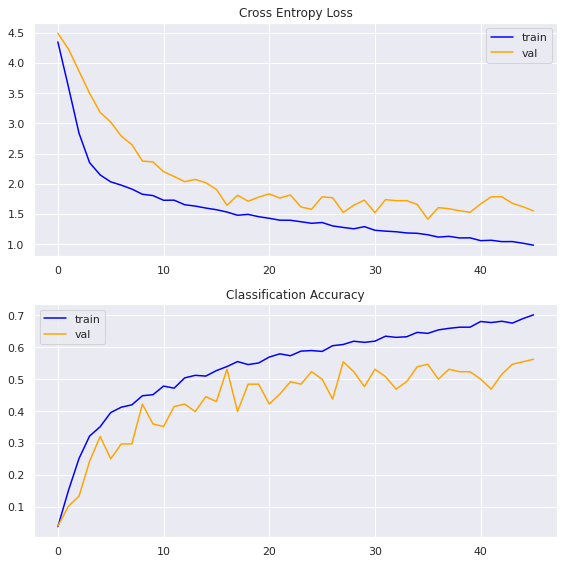


Test set evaluation metrics
10/10 [==============================] - 0s 5ms/step - loss: 1.4591 - accuracy: 0.5594
Loss: 1.46
Accuracy: 0.56


In [59]:
model_report(first_model,first_model_history)
first_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/first_model_32.h5')

In [60]:
BATCH_SIZE = 256
train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object


def train_model(model,name,early_stopping, epochs = 10, steps_per_epoch = 2, verbose=2 , validation_steps = 1):
  
  dir = os.path.join('/content/drive/My Drive/Neural_Networks/lab3/models', name)
  
  if (early_stopping==1):
    tensorboard_callback = tf.keras.callbacks.TensorBoard(dir, histogram_freq=1)
    early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True) 
    history = model.fit(train_ds, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps, callbacks=[tensorboard_callback, early_stopping_callback])
  else:
    history = model.fit(train_ds, epochs=epochs, verbose=2, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps)
  return(history)

# print test set evaluation metrics
def model_evaluation(model, evaluation_steps=10):
  print('\nTest set evaluation metrics')
  loss0,accuracy0 = model.evaluate(test_ds, steps = evaluation_steps)
  print("Loss: {:.2f}".format(loss0))
  print("Accuracy: {:.2f}".format(accuracy0))

def model_report(model, history, evaluation_steps = 10):
	plt = summarize_diagnostics(history)
	plt.show()
	model_evaluation(model, evaluation_steps)

In [61]:
%%time
first_model = init_first_model(True,32,tf.optimizers.Adam(learning_rate=0.0001))
first_model_history = train_model(first_model,"first_model_1",True, 200, 40, 10)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 15, 15, 32)        96        
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 2, 2, 128)        

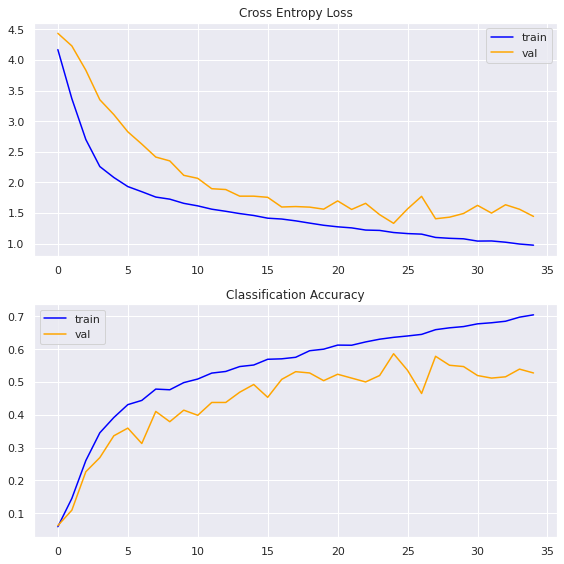


Test set evaluation metrics
10/10 [==============================] - 0s 7ms/step - loss: 1.4768 - accuracy: 0.5605
Loss: 1.48
Accuracy: 0.56


In [62]:
model_report(first_model,first_model_history)
first_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/first_model_32.h5')

## Μελέτη learning rate

In [70]:
%%time
first_model = init_first_model(True,32,tf.optimizers.Adam(learning_rate=0.01))
first_model_history = train_model(first_model,"first_model_1",True, 200, 40, 10)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 15, 15, 32)        96        
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 2, 2, 128)       

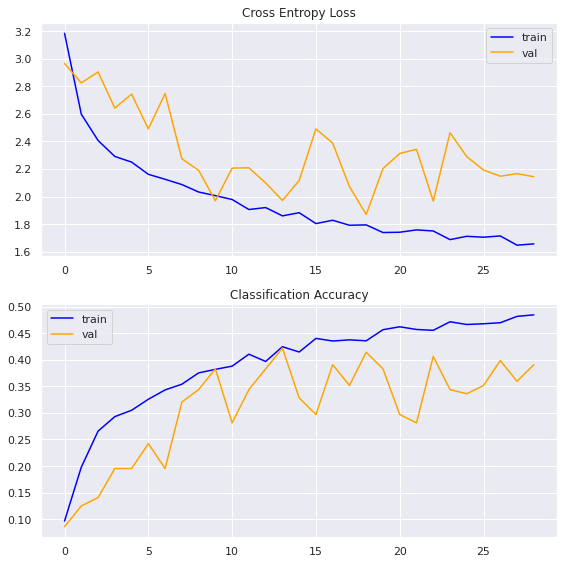


Test set evaluation metrics
10/10 [==============================] - 0s 4ms/step - loss: 1.9264 - accuracy: 0.4094
Loss: 1.93
Accuracy: 0.41


In [71]:
model_report(first_model,first_model_history)
first_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/first_model_32.h5')

In [64]:
%%time
first_model = init_first_model(True,32,tf.optimizers.Adam(learning_rate=0.001))
first_model_history = train_model(first_model,"first_model_1",True, 200, 40, 10)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 15, 15, 32)        96        
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 2, 2, 128)       

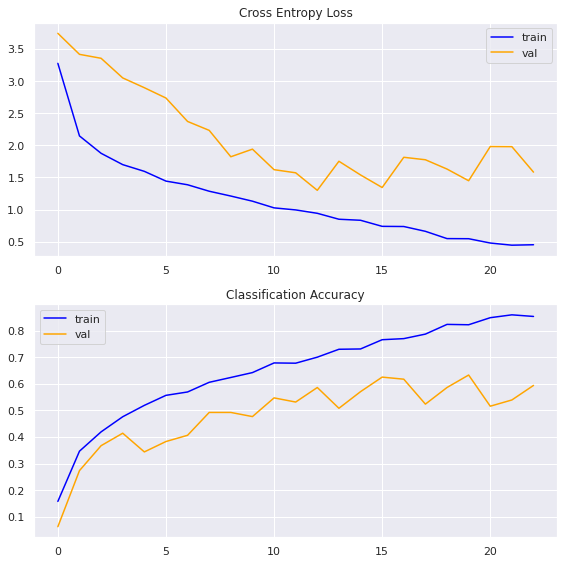


Test set evaluation metrics
10/10 [==============================] - 0s 4ms/step - loss: 1.3943 - accuracy: 0.5641
Loss: 1.39
Accuracy: 0.56


In [65]:
model_report(first_model,first_model_history)
first_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/first_model_32.h5')

In [66]:
%%time
first_model = init_first_model(True,32,tf.optimizers.Adam(learning_rate=0.0001))
first_model_history = train_model(first_model,"first_model_1",True, 200, 40, 10)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 15, 15, 32)        96        
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 2, 2, 128)       

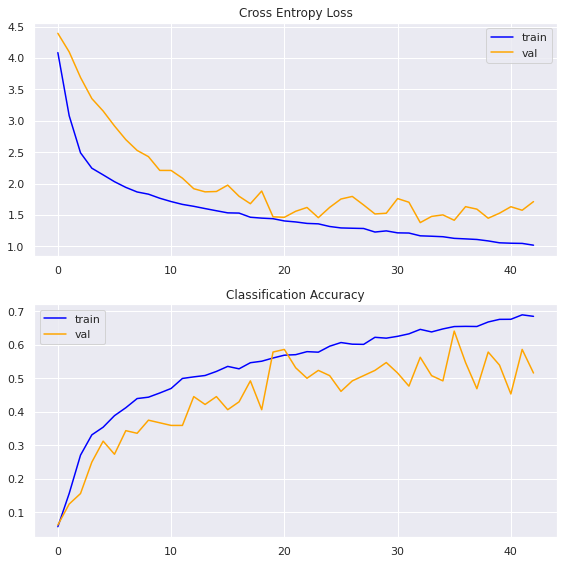


Test set evaluation metrics
10/10 [==============================] - 0s 4ms/step - loss: 1.4845 - accuracy: 0.5359
Loss: 1.48
Accuracy: 0.54


In [67]:
model_report(first_model,first_model_history)
first_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/first_model_32.h5')

In [68]:
%%time
first_model = init_first_model(True,32,tf.optimizers.Adam(learning_rate=0.00001))
first_model_history = train_model(first_model,"first_model_1",True, 200, 40, 10)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 15, 15, 32)        96        
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 2, 2, 128)       

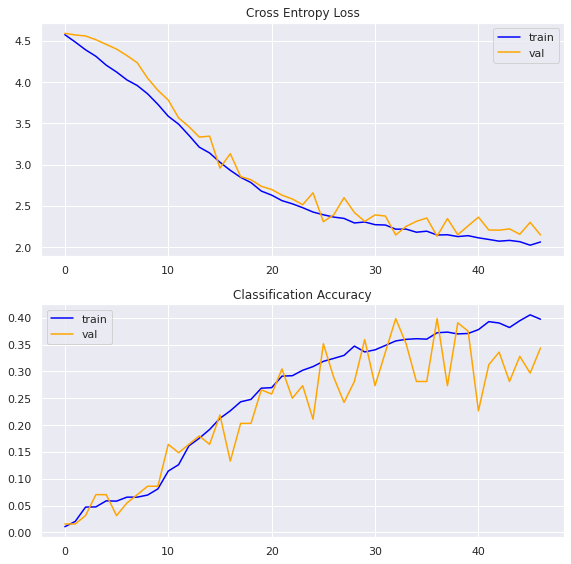


Test set evaluation metrics
10/10 [==============================] - 0s 5ms/step - loss: 2.2079 - accuracy: 0.3500
Loss: 2.21
Accuracy: 0.35


In [69]:
model_report(first_model,first_model_history)
first_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/first_model_32.h5')

## Μελέτη optimizer

In [78]:
%%time
first_model = init_first_model(True,32,tf.keras.optimizers.SGD( learning_rate=0.001 ))
first_model_history = train_model(first_model,"first_model_1",True, 200, 40, 10)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 15, 15, 32)        96        
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 2, 2, 128)       

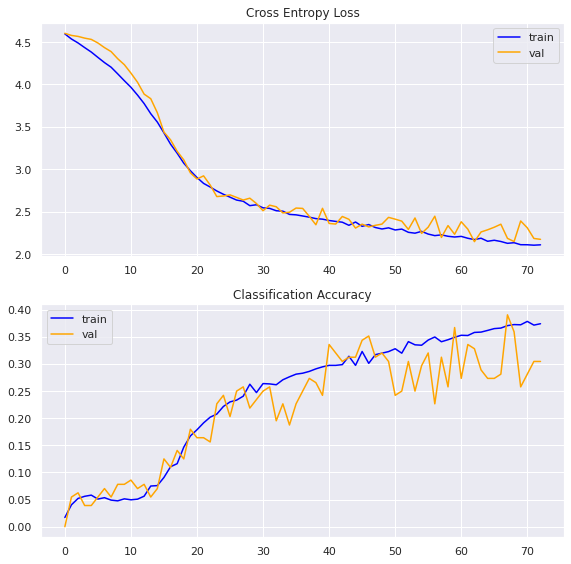


Test set evaluation metrics
10/10 [==============================] - 0s 5ms/step - loss: 2.2280 - accuracy: 0.3461
Loss: 2.23
Accuracy: 0.35


In [79]:
model_report(first_model,first_model_history)
first_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/first_model_32.h5')

In [80]:
%%time
first_model = init_first_model(True,32,tf.keras.optimizers.Adadelta( learning_rate=0.001))
first_model_history = train_model(first_model,"first_model_1",True, 200, 40, 10)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 15, 15, 32)        96        
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 2, 2, 128)       

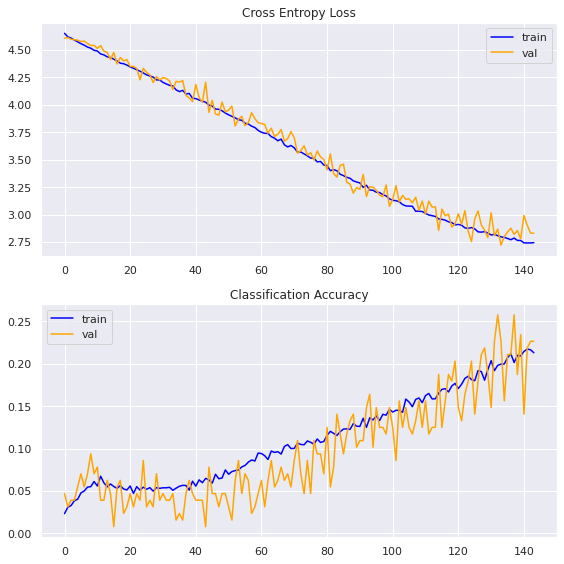


Test set evaluation metrics
10/10 [==============================] - 0s 6ms/step - loss: 2.7974 - accuracy: 0.1961
Loss: 2.80
Accuracy: 0.20


In [84]:
model_report(first_model,first_model_history)
first_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/first_model_32.h5')

In [85]:
%%time
first_model = init_first_model(True,32,tf.keras.optimizers.Adagrad( learning_rate=0.001 ))
first_model_history = train_model(first_model,"first_model_1",True, 200, 40, 10)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 15, 15, 32)        96        
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 2, 2, 128)       

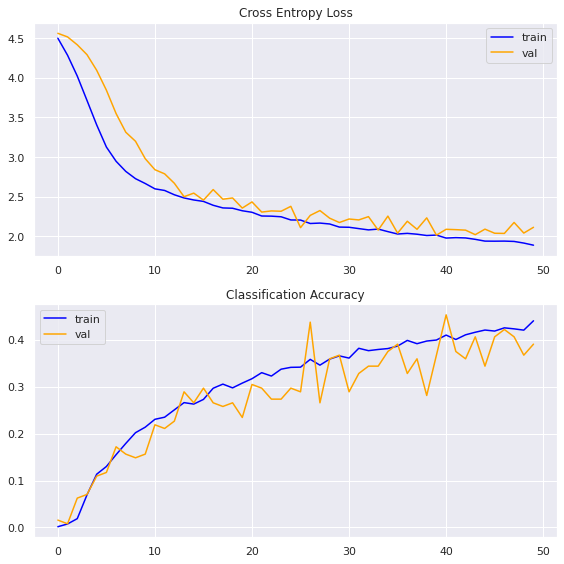


Test set evaluation metrics
10/10 [==============================] - 0s 4ms/step - loss: 2.0105 - accuracy: 0.3961
Loss: 2.01
Accuracy: 0.40


In [86]:
model_report(first_model,first_model_history)
first_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/first_model_32.h5')

In [94]:
%%time
first_model = init_first_model(True,32,tf.keras.optimizers.Nadam( learning_rate=0.001 ))
first_model_history = train_model(first_model,"first_model_1",True, 200, 40, 10)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 15, 15, 32)        96        
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 2, 2, 128)       

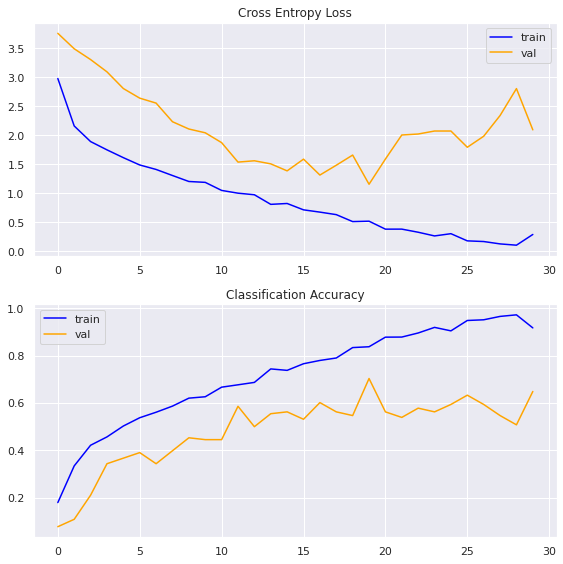


Test set evaluation metrics
10/10 [==============================] - 0s 5ms/step - loss: 1.4750 - accuracy: 0.5953
Loss: 1.48
Accuracy: 0.60


In [95]:
model_report(first_model,first_model_history)
first_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/first_model_32.h5')

## epochs

In [98]:
%%time
first_model = init_first_model(True,32,tf.keras.optimizers.Nadam( learning_rate=0.001 ))
first_model_history = train_model(first_model,"first_model_1",0, 50, 40, 10)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 15, 15, 32)        96        
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 2, 2, 128)       

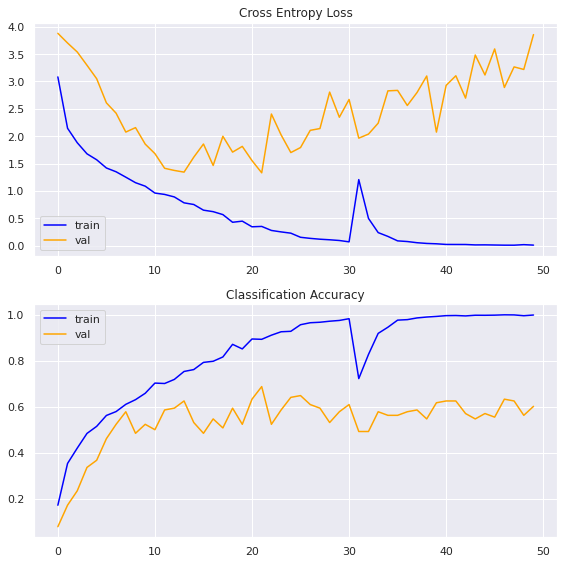


Test set evaluation metrics
10/10 [==============================] - 0s 5ms/step - loss: 2.7557 - accuracy: 0.6086
Loss: 2.76
Accuracy: 0.61


In [99]:
model_report(first_model,first_model_history)
first_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/first_model_32.h5')

In [100]:
%%time
first_model = init_first_model(True,32,tf.keras.optimizers.Nadam( learning_rate=0.001 ))
first_model_history = train_model(first_model,"first_model_1",0, 100, 40, 10)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 15, 15, 32)        96        
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 2, 2, 128)       

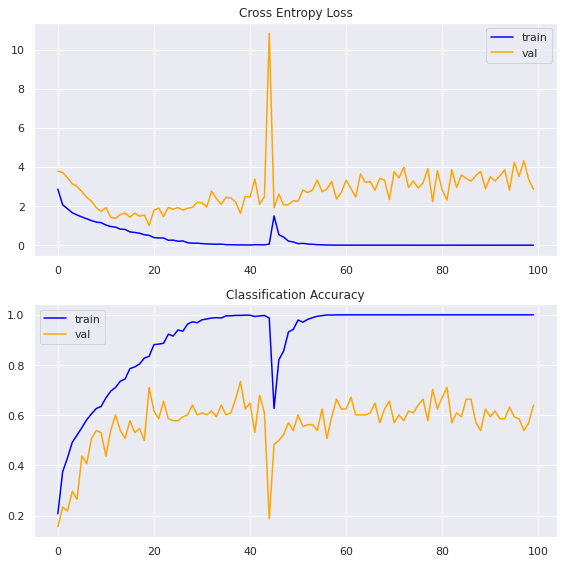


Test set evaluation metrics
10/10 [==============================] - 0s 4ms/step - loss: 3.4486 - accuracy: 0.6219
Loss: 3.45
Accuracy: 0.62


In [101]:
model_report(first_model,first_model_history)
first_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/first_model_32.h5')

In [102]:
%%time
first_model = init_first_model(True,32,tf.keras.optimizers.Nadam( learning_rate=0.001 ))
first_model_history = train_model(first_model,"first_model_1",0, 150, 40, 10)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 15, 15, 32)        96        
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 2, 2, 128)       

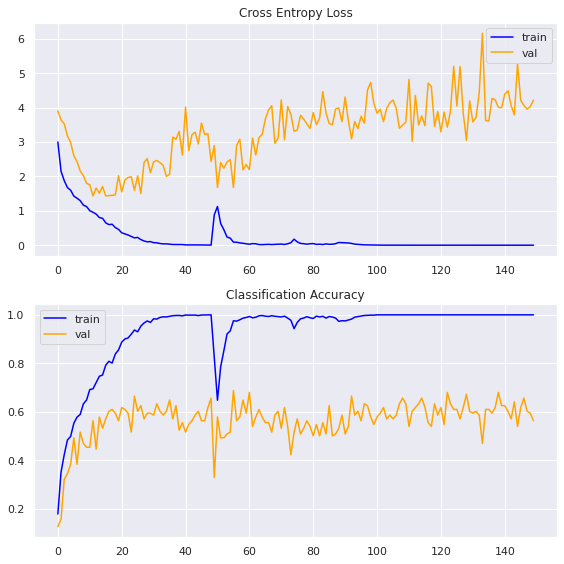


Test set evaluation metrics
10/10 [==============================] - 0s 5ms/step - loss: 3.9269 - accuracy: 0.6117
Loss: 3.93
Accuracy: 0.61


In [103]:
model_report(first_model,first_model_history)
first_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/first_model_32.h5')

In [96]:
%%time
first_model = init_first_model(True,32,tf.keras.optimizers.Nadam( learning_rate=0.001 ))
first_model_history = train_model(first_model,"first_model_1",0, 200, 40, 10)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 15, 15, 32)        96        
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 2, 2, 128)       

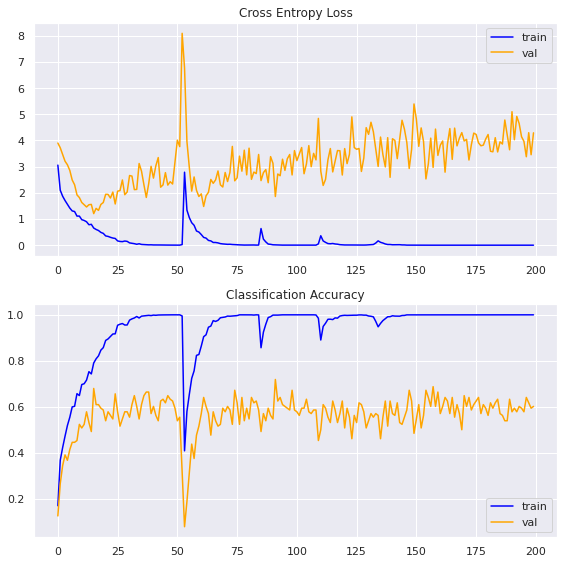


Test set evaluation metrics
10/10 [==============================] - 0s 5ms/step - loss: 4.3859 - accuracy: 0.6031
Loss: 4.39
Accuracy: 0.60


In [97]:
model_report(first_model,first_model_history)
first_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/first_model_32.h5')

In [104]:
%%time
first_model = init_first_model(True,32,tf.keras.optimizers.Nadam( learning_rate=0.001 ))
first_model_history = train_model(first_model,"first_model_1",1, 150, 40, 10)

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 15, 15, 32)        96        
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 2, 2, 128)       

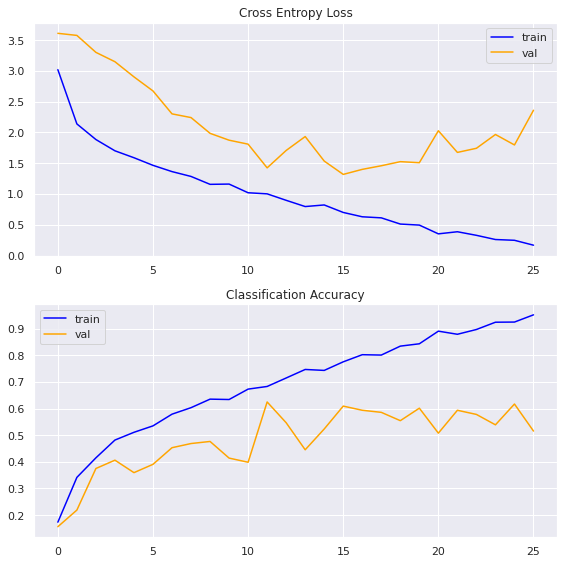


Test set evaluation metrics
10/10 [==============================] - 0s 4ms/step - loss: 1.3809 - accuracy: 0.5781
Loss: 1.38
Accuracy: 0.58


In [105]:
model_report(first_model,first_model_history)
first_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/first_model_32.h5')

## data broken

In [204]:
BATCH_SIZE = 128

def random_crop(img, random_crop_size):
    height, width = img.shape[0], img.shape[1]
    dy, dx = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    return img[y:(y+dy), x:(x+dx),:]

def split_input_batches(x,y, BATCH_SIZE):
  ds = tf.data.Dataset.from_tensor_slices((x,y))
  ds = ds.shuffle(buffer_size = data_size)
  ds = ds.batch(BATCH_SIZE)
  ds = ds.repeat()
  ds = ds.prefetch(buffer_size = AUTOTUNE)
  return ds

def crop_generator(batches, crop_length, num_channel = 3):
    while True:
        batch_x, batch_y = next(batches)
        batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, num_channel))
        for i in range(batch_x.shape[0]):
            batch_crops[i] = random_crop(batch_x[i], (crop_length, crop_length))
        yield (batch_crops, batch_y)

TRAINING_DATAGEN =  tf.keras.preprocessing.image.ImageDataGenerator(
    
    width_shift_range = 0.001,
    height_shift_range = 0.001,
    zoom_range = 0.001,
    horizontal_flip = False)

VALIDATION_DATAGEN =  tf.keras.preprocessing.image.ImageDataGenerator()

def resize_and_augment(pretrained_model, training_datagen = '', validation_datagen = ''):
  if pretrained_model == "Xception" :
    X_train_used, X_val_used, X_test_used = tf.image.resize_images(X_train, (71, 71)), tf.image.resize_images(X_val, (71, 71)), tf.image.resize_images(X_test, (71, 71))
    with tf.Session() as sess:
      X_train_used = x_train_used.eval()
      X_val_used   = x_val_used.eval()
      X_test_used  = x_test_used.eval()
  else:
    X_train_used, X_val_used, X_test_used = x_train, x_val, x_test
  
  if training_datagen != "":
    train_tf = training_datagen.flow(X_train_used, map_label(y_train), batch_size = BATCH_SIZE)
    validation_tf = validation_datagen.flow(X_val_used, map_label(y_val), batch_size = BATCH_SIZE)  
  else:
    train_tf = split_input_batches(X_train_used, map_label(y_train), BATCH_SIZE)
    validation_tf = split_input_batches(X_val_used, map_label(y_val), BATCH_SIZE)  

  test_tf = split_input_batches(X_test_used,map_label(y_test), BATCH_SIZE) 

  return train_tf, validation_tf, test_tf

In [205]:
train_ds,validation_ds,test_ds = resize_and_augment("lalal",TRAINING_DATAGEN,VALIDATION_DATAGEN )

In [157]:
def train_model(model,name,early_stopping, epochs = 10, steps_per_epoch = 2, verbose=2 , validation_steps = 1):
  
  dir = os.path.join('/content/drive/My Drive/Neural_Networks/lab3/models', name)
  
  if (early_stopping==1):
    tensorboard_callback = tf.keras.callbacks.TensorBoard(dir, histogram_freq=1)
    early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True) 
    history = model.fit(train_ds, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps, callbacks=[tensorboard_callback, early_stopping_callback])
  else:
    history = model.fit(train_ds, epochs=epochs, verbose=2, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps)
  return(history)
  
# print test set evaluation metrics
def model_evaluation(model, evaluation_steps=10):
  print('\nTest set evaluation metrics')
  #loss0,accuracy0,precision0,recall0 = model.evaluate(test_ds, steps = evaluation_steps)
  loss0,accuracy0 = model.evaluate(test_ds, steps = evaluation_steps)
  print("Loss: {:.2f}".format(loss0))
  print("Accuracy: {:.2f}".format(accuracy0))
  #print("Precision: {:.2f}".format(precision0))
  #print("Recall: {:.2f}".format(recall0))

def model_report(model, history, evaluation_steps = 10):
	plt = summarize_diagnostics(history)
	plt.show()
	model_evaluation(model, evaluation_steps)

In [158]:
%%time
first_model = init_first_model(True,32,tf.keras.optimizers.Nadam( learning_rate=0.001 ))
first_model_history = train_model(first_model,"first_model_1",0, 200, 40, 10)

ValueError: ignored

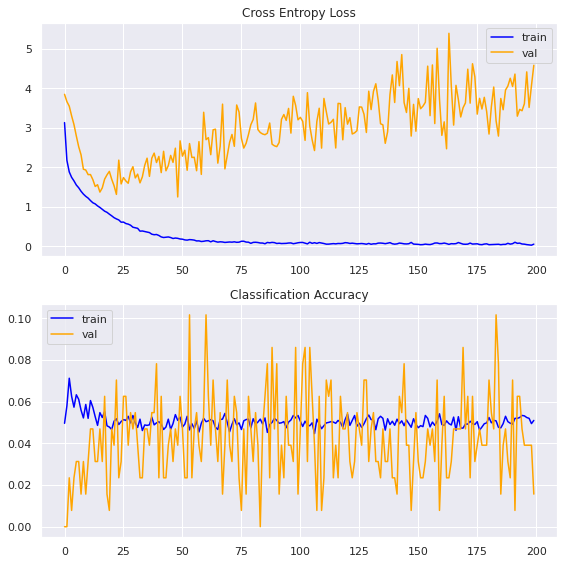


Test set evaluation metrics
10/10 [==============================] - 0s 5ms/step - loss: 3.6961 - accuracy: 0.0375
Loss: 3.70
Accuracy: 0.04


In [113]:
model_report(first_model,first_model_history)
first_model.save('/content/drive/My Drive/Neural_Networks/lab3/models/first_model_32.h5')

# Μεταφορά μάθησης

#VGG16

In [66]:
def init_VGG16_model(summary, trainable):
  VGG16_MODEL=tf.keras.applications.VGG16(input_shape=(32,32,3), include_top=False, weights='imagenet')

  if (trainable == "all"):
    VGG16_MODEL.trainable=True
  elif (trainable == "top"):
    VGG16_MODEL.trainable=False
  else:
    percentage = float(trainable)/100
    nlayers =  len(VGG16_MODEL.layers)
    nfreeze = ceil(nlayers*percentage)

    for layer in VGG16_MODEL.layers[:nfreeze]:
	    layer.trainable = False


  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(len(CIFAR100_LABELS_LIST),activation='softmax')
  model = tf.keras.Sequential([VGG16_MODEL, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.00005), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [67]:
%%time
VGG16_MODEL_all = init_VGG16_model(True, "all")
VGG16_MODEL_all_history = train_model(VGG16_MODEL_all,"VGG16_all_1",True, 200, 40, 10)

58892288/58889256 [==============================] - 0s 0us/step
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_18 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 100)               51300     
Total params: 14,765,988
Trainable params: 14,765,988
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
40/40 [==============================] - 5s 89ms/step - loss: 4.0432 - accuracy: 0.0861 - val_loss: 2.0910 - val_accuracy: 0.4062
Epoch 2/200
40/40 [=============

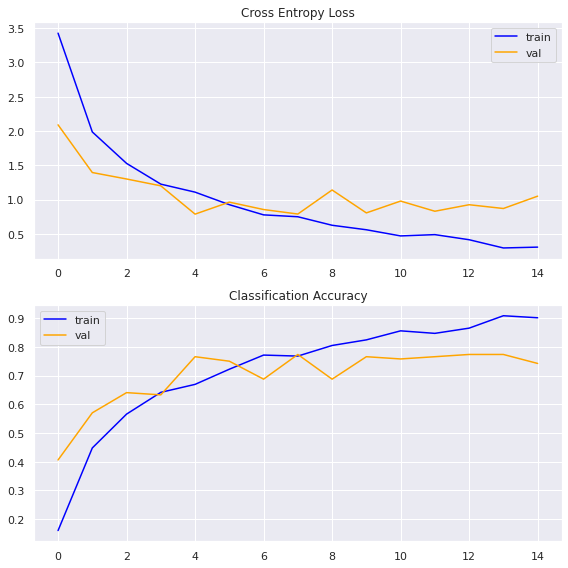


Test set evaluation metrics
10/10 [==============================] - 0s 19ms/step - loss: 0.9433 - accuracy: 0.7031
Loss: 0.94
Accuracy: 0.70


In [68]:
model_report(VGG16_MODEL_all,VGG16_MODEL_all_history)
VGG16_MODEL_all.save('/content/drive/My Drive/Neural_Networks/lab3/models/VGG16_all_32.h5')

In [69]:
%%time
VGG16_MODEL_5 = init_VGG16_model(summary = True, trainable = "5")
VGG16_MODEL_5_history = train_model(VGG16_MODEL_5,"VGG16_5%_1",True, 200, 40, 10)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_19 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 100)               51300     
Total params: 14,765,988
Trainable params: 14,765,988
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
40/40 [==============================] - 4s 91ms/step - loss: 3.9745 - accuracy: 0.1098 - val_loss: 1.6800 - val_accuracy: 0.5625
Epoch 2/200
40/40 [==============================] - 2s 61ms/step - loss: 2.0238 - accuracy: 0.44

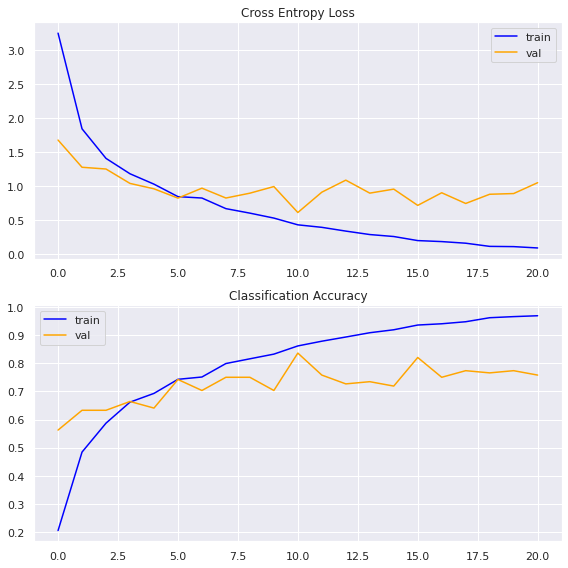


Test set evaluation metrics
10/10 [==============================] - 0s 22ms/step - loss: 0.7881 - accuracy: 0.7695
Loss: 0.79
Accuracy: 0.77


In [70]:
model_report(VGG16_MODEL_5,VGG16_MODEL_5_history)
VGG16_MODEL_5.save('/content/drive/My Drive/Neural_Networks/lab3/models/VGG16_5%_32.h5')

In [71]:
%%time
VGG16_MODEL_20 = init_VGG16_model(summary = True, trainable = "20")
VGG16_MODEL_20_history = train_model(VGG16_MODEL_20,"VGG16_20%_1",True, 200, 40, 10)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_20 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 100)               51300     
Total params: 14,765,988
Trainable params: 14,727,268
Non-trainable params: 38,720
_________________________________________________________________
Epoch 1/200
40/40 [==============================] - 4s 73ms/step - loss: 4.1233 - accuracy: 0.0771 - val_loss: 1.8490 - val_accuracy: 0.4844
Epoch 2/200
40/40 [==============================] - 2s 52ms/step - loss: 2.1927 - accuracy:

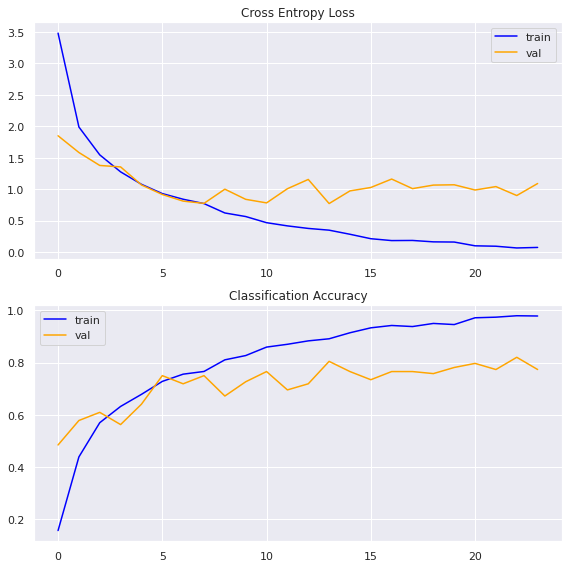


Test set evaluation metrics
10/10 [==============================] - 0s 17ms/step - loss: 0.7682 - accuracy: 0.7781
Loss: 0.77
Accuracy: 0.78


In [72]:
model_report(VGG16_MODEL_20,VGG16_MODEL_20_history)
VGG16_MODEL_20.save('/content/drive/My Drive/Neural_Networks/lab3/models/VGG16_20%_32.h5')

#VGG19

In [73]:
def init_VGG19_model(summary, trainable):
  VGG16_MODEL=tf.keras.applications.VGG19(input_shape=(32,32,3), include_top=False, weights='imagenet')

  if (trainable == "all"):
    # unfreeze conv layers
    VGG16_MODEL.trainable=True
  elif (trainable == "top"):
    VGG16_MODEL.trainable=False
  else:
    percentage = float(trainable)/100
    nlayers =  len(VGG16_MODEL.layers)
    nfreeze = ceil(nlayers*percentage)

    for layer in VGG16_MODEL.layers[:nfreeze]:
	    layer.trainable = False


  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(len(CIFAR100_LABELS_LIST),activation='softmax')
  model = tf.keras.Sequential([VGG16_MODEL, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.00005), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [74]:
%%time
VGG19_MODEL_all = init_VGG19_model(True, "all")
VGG19_MODEL_all_history = train_model(VGG19_MODEL_all,"VGG19_all_1",True, 400, 40, 10)

80142336/80134624 [==============================] - 1s 0us/step
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
dropout_21 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_3 ( (None, 512)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 100)               51300     
Total params: 20,075,684
Trainable params: 20,075,684
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
40/40 [==============================] - 5s 95ms/step - loss: 4.1668 - accuracy: 0.0791 - val_loss: 2.0051 - val_accuracy: 0.4688
Epoch 2/400
40/40 [=============

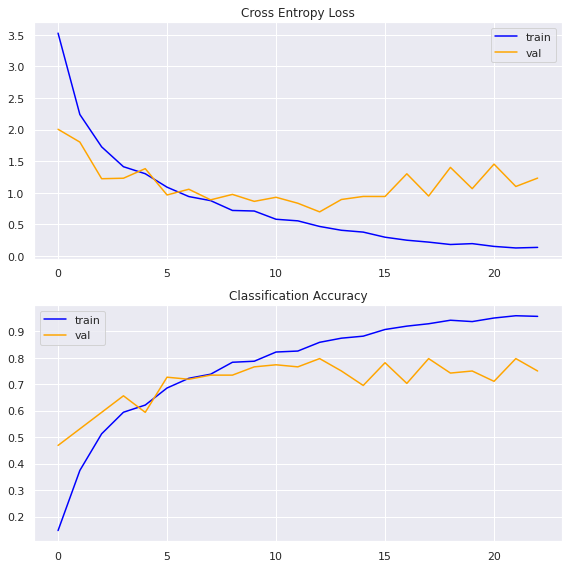


Test set evaluation metrics
10/10 [==============================] - 0s 26ms/step - loss: 0.8247 - accuracy: 0.7664
Loss: 0.82
Accuracy: 0.77


In [75]:
model_report(VGG19_MODEL_all,VGG19_MODEL_all_history)
VGG19_MODEL_all.save('/content/drive/My Drive/Neural_Networks/lab3/models/VGG19_all_32.h5')

In [76]:
%%time
VGG19_MODEL_5 = init_VGG19_model(summary = True, trainable = "5")
VGG19_MODEL_5_history = train_model(VGG19_MODEL_5,"VGG19_5%_1",True, 200, 40, 10)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
dropout_22 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_4 ( (None, 512)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 100)               51300     
Total params: 20,075,684
Trainable params: 20,073,892
Non-trainable params: 1,792
_________________________________________________________________
Epoch 1/200
40/40 [==============================] - 5s 91ms/step - loss: 4.1675 - accuracy: 0.0742 - val_loss: 2.1460 - val_accuracy: 0.3984
Epoch 2/200
40/40 [==============================] - 3s 71ms/step - loss: 2.2511 - accuracy: 

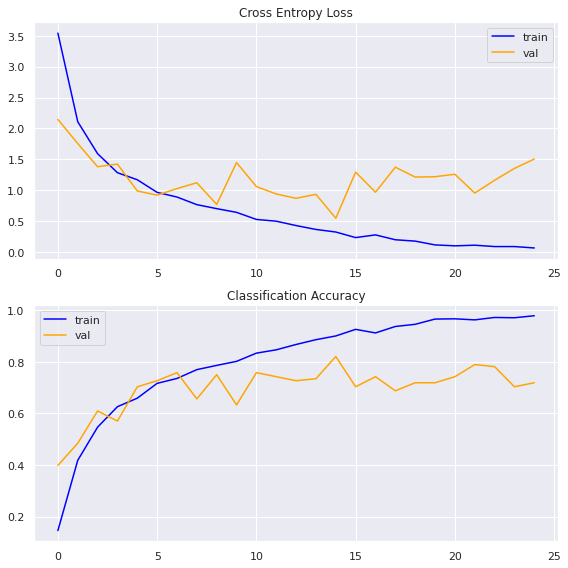


Test set evaluation metrics
10/10 [==============================] - 0s 29ms/step - loss: 0.8518 - accuracy: 0.7734
Loss: 0.85
Accuracy: 0.77


In [77]:
model_report(VGG19_MODEL_5,VGG19_MODEL_5_history)
VGG19_MODEL_5.save('/content/drive/My Drive/Neural_Networks/lab3/models/VGG19_5%_32.h5')

In [78]:
%%time
VGG19_MODEL_20 = init_VGG19_model(summary = True, trainable = "20")
VGG19_MODEL_20_history = train_model(VGG19_MODEL_20,"VGG19_20%_1",True, 200, 40, 10)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
dropout_23 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_5 ( (None, 512)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 100)               51300     
Total params: 20,075,684
Trainable params: 19,963,108
Non-trainable params: 112,576
_________________________________________________________________
Epoch 1/200
40/40 [==============================] - 4s 77ms/step - loss: 4.0505 - accuracy: 0.0899 - val_loss: 2.1253 - val_accuracy: 0.4609
Epoch 2/200
40/40 [==============================] - 3s 66ms/step - loss: 2.3739 - accuracy

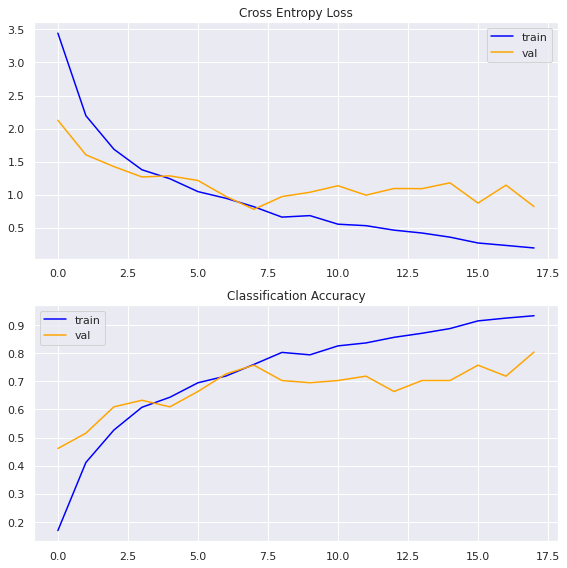


Test set evaluation metrics
10/10 [==============================] - 0s 28ms/step - loss: 0.9173 - accuracy: 0.7266
Loss: 0.92
Accuracy: 0.73


In [79]:
model_report(VGG19_MODEL_20,VGG19_MODEL_20_history)
VGG19_MODEL_20.save('/content/drive/My Drive/Neural_Networks/lab3/models/VGG19_20%_32.h5')

#DenseNet

In [17]:
def init_DenseNet_model(summary, trainable):
  ResNet50=tf.keras.applications.DenseNet121(input_shape=(32,32,3), include_top=False, weights='imagenet')

  if (trainable == "all"):
    # unfreeze conv layers
    ResNet50.trainable=True
  elif (trainable == "top"):
    ResNet50.trainable=False
  else:
    percentage = float(trainable)/100
    nlayers =  len(ResNet50.layers)
    nfreeze = ceil(nlayers*percentage)

    for layer in ResNet50.layers[:nfreeze]:
	    layer.trainable = False


  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(len(CIFAR100_LABELS_LIST),activation='softmax')
  model = tf.keras.Sequential([ResNet50, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.00005), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [18]:
%%time
DenseNet_MODEL_all = init_DenseNet_model(True, "all")
DenseNet_MODEL_all_history = train_model(DenseNet_MODEL_all,"DenseNet_all_1",True, 400, 40, 10)

29089792/29084464 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1, 1, 1024)        7037504   
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 1024)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               102500    
Total params: 7,140,004
Trainable params: 7,056,356
Non-trainable params: 83,648
_________________________________________________________________
Epoch 1/400
40/40 [==============================] - 34s 296ms/step - loss: 5.8985 - accuracy: 0.0231 - val_loss: 4.3790 - val_accuracy: 0.0156
Epoch 2/400
40/40 [===========

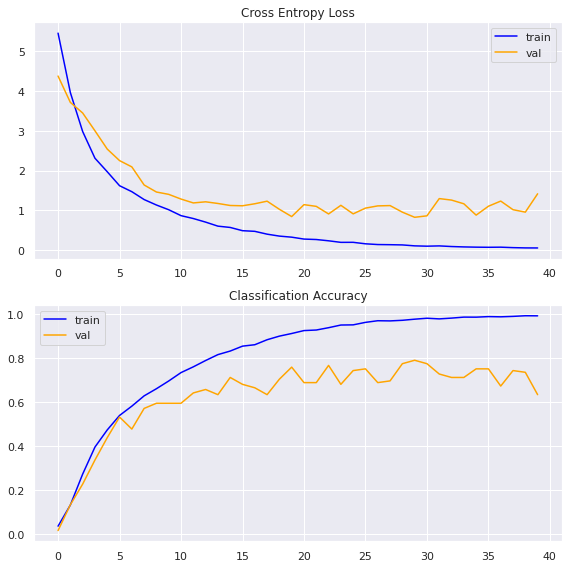


Test set evaluation metrics
10/10 [==============================] - 1s 65ms/step - loss: 0.9660 - accuracy: 0.7352
Loss: 0.97
Accuracy: 0.74


In [19]:
model_report(DenseNet_MODEL_all,DenseNet_MODEL_all_history)
DenseNet_MODEL_all.save('/content/drive/My Drive/Neural_Networks/lab3/models/DenseNet_all_32.h5')

# ResNet50

In [90]:
def init_ResNet50_model(summary, trainable):
  ResNet50=tf.keras.applications.ResNet50(input_shape=(32,32,3), include_top=False, weights='imagenet')

  if (trainable == "all"):
    # unfreeze conv layers
    ResNet50.trainable=True
  elif (trainable == "top"):
    ResNet50.trainable=False
  else:
    percentage = float(trainable)/100
    nlayers =  len(ResNet50.layers)
    nfreeze = ceil(nlayers*percentage)

    for layer in ResNet50.layers[:nfreeze]:
	    layer.trainable = False


  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(len(CIFAR100_LABELS_LIST),activation='softmax')
  model = tf.keras.Sequential([ResNet50, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.00005), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [91]:
%%time
ResNet50_MODEL_all = init_ResNet50_model(True, "all")
ResNet50_MODEL_all_history = train_model(ResNet50_MODEL_all,"ResNet50_all_1",True, 400, 40, 10)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
dropout_26 (Dropout)         (None, 1, 1, 2048)        0         
_________________________________________________________________
global_average_pooling2d_8 ( (None, 2048)              0         
_________________________________________________________________
dense_46 (Dense)             (None, 100)               204900    
Total params: 23,792,612
Trainable params: 23,739,492
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/400
40/40 [==============================] - 9s 115ms/step - loss: 7.6187 - accuracy: 0.0165 - val_loss: 15.8204 - val_accuracy: 0.0547
Epoch 2/400
40/40 [==============================] - 3s 77ms/step - loss: 5.1684 - accurac

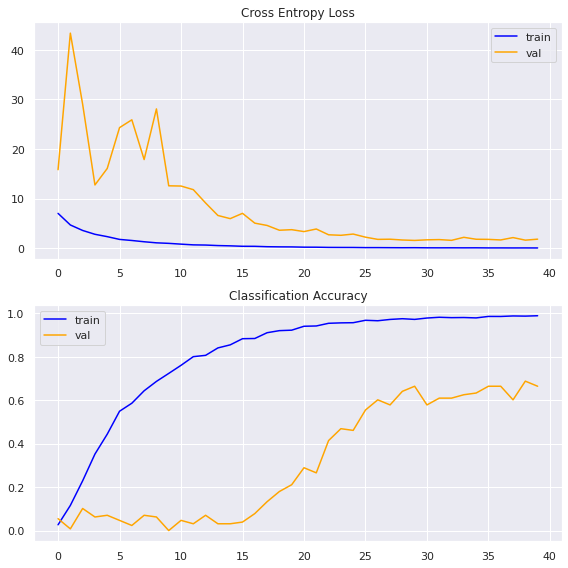


Test set evaluation metrics
10/10 [==============================] - 0s 28ms/step - loss: 1.7414 - accuracy: 0.6297
Loss: 1.74
Accuracy: 0.63


In [92]:
model_report(ResNet50_MODEL_all,ResNet50_MODEL_all_history)
ResNet50_MODEL_all.save('/content/drive/My Drive/Neural_Networks/lab3/models/ResNet50_all_32.h5')

#Xception

In [210]:
train_ds = read_dataset(dir_74dim_img + "train_74dim")
validation_ds  = read_dataset(dir_74dim_img + "val_74dim")
test_ds  = read_dataset(dir_74dim_img + "test_74dim")

train_ds =_input_fn_for_bigger_images(train_ds, 128) 
validation_ds =_input_fn_for_bigger_images(validation_ds, 128)
test_ds =_input_fn_for_bigger_images(test_ds, 128)


def train_model(model,name,early_stopping, epochs = 10, steps_per_epoch = 2, verbose=2 , validation_steps = 1):
  
  dir = os.path.join('/content/drive/My Drive/Neural_Networks/lab3/models', name)
  
  if (early_stopping==1):
    tensorboard_callback = tf.keras.callbacks.TensorBoard(dir, histogram_freq=1)
    early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True) 
    history = model.fit(train_ds, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps, callbacks=[tensorboard_callback, early_stopping_callback])
  else:
    history = model.fit(train_ds, epochs=epochs, verbose=2, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps)
  return(history)
  
# print test set evaluation metrics
def model_evaluation(model, evaluation_steps=10):
  print('\nTest set evaluation metrics')
  #loss0,accuracy0,precision0,recall0 = model.evaluate(test_ds, steps = evaluation_steps)
  loss0,accuracy0 = model.evaluate(test_ds, steps = evaluation_steps)
  print("Loss: {:.2f}".format(loss0))
  print("Accuracy: {:.2f}".format(accuracy0))
  #print("Precision: {:.2f}".format(precision0))
  #print("Recall: {:.2f}".format(recall0))

def model_report(model, history, evaluation_steps = 10):
	plt = summarize_diagnostics(history)
	plt.show()
	model_evaluation(model, evaluation_steps)

In [211]:
def train_model(model,name,early_stopping, epochs = 10, steps_per_epoch = 2, verbose=2 , validation_steps = 1):
  
  dir = os.path.join('/content/drive/My Drive/Neural_Networks/lab3/models', name)
  
  if (early_stopping==1):
    tensorboard_callback = tf.keras.callbacks.TensorBoard(dir, histogram_freq=1)
    early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True) 
    history = model.fit(train_ds, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps, callbacks=[tensorboard_callback, early_stopping_callback])
  else:
    history = model.fit(train_ds, epochs=epochs, verbose=2, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps)
  return(history)

In [212]:
def init_Xception_model(summary, trainable):
  Xception=tf.keras.applications.Xception(input_shape=(74,74,3), include_top=False, weights='imagenet')

  if (trainable == "all"):
    # unfreeze conv layers
    Xception.trainable=True
  elif (trainable == "top"):
    Xception.trainable=False
  else:
    percentage = float(trainable)/100
    nlayers =  len(Xception.layers)
    nfreeze = ceil(nlayers*percentage)

    for layer in Xception.layers[:nfreeze]:
	    layer.trainable = False


  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(len(CIFAR100_LABELS_LIST),activation='softmax')
  model = tf.keras.Sequential([Xception, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.00005), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [209]:
%%time
Xception_MODEL_all = init_Xception_model(True, "all")
Xception_MODEL_all_history = train_model(Xception_MODEL_all,"Xception_all_1",True, 400, 40, 10)

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 3, 3, 2048)        20861480  
_________________________________________________________________
dropout_16 (Dropout)         (None, 3, 3, 2048)        0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_120 (Dense)            (None, 100)               204900    
Total params: 21,066,380
Trainable params: 21,011,852
Non-trainable params: 54,528
_________________________________________________________________
Epoch 1/400
40/40 [==============================] - 23s 397ms/step - loss: 4.4031 - accuracy: 0.0750 - val_loss: 3.3039 - val_accuracy: 0.2891
Epoch 2/400
40/40 [==============================] - 15s 363ms/step - loss: 3.2033 - accur

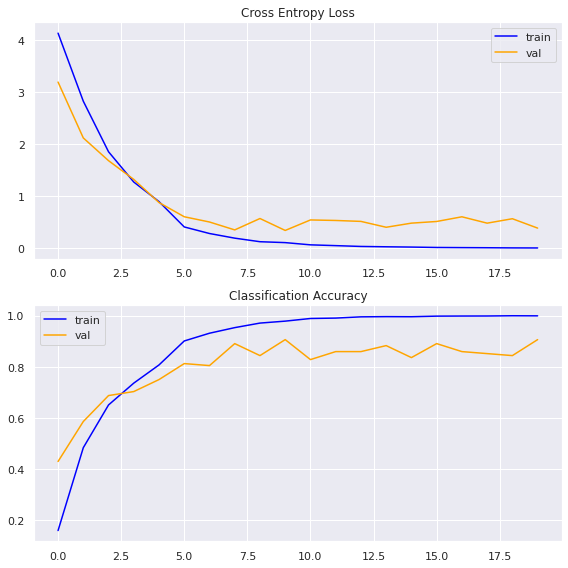


Test set evaluation metrics
10/10 [==============================] - 2s 76ms/step - loss: 0.4298 - accuracy: 0.8805
Loss: 0.43
Accuracy: 0.88


In [128]:
model_report(Xception_MODEL_all,Xception_MODEL_all_history)
Xception_MODEL_all.save('/content/drive/My Drive/Neural_Networks/lab3/models/Xception_all_32.h5')

In [216]:
%%time
Xception_MODEL_all = init_Xception_model(True, "20")
Xception_MODEL_all_history = train_model(Xception_MODEL_all,"Xception_20_1",True, 400, 40, 10)

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 3, 3, 2048)        20861480  
_________________________________________________________________
dropout_18 (Dropout)         (None, 3, 3, 2048)        0         
_________________________________________________________________
global_average_pooling2d_4 ( (None, 2048)              0         
_________________________________________________________________
dense_122 (Dense)            (None, 100)               204900    
Total params: 21,066,380
Trainable params: 20,821,036
Non-trainable params: 245,344
_________________________________________________________________
Epoch 1/400
40/40 [==============================] - 25s 335ms/step - loss: 2.4608 - accuracy: 0.4717 - val_loss: 2.2306 - val_accuracy: 0.6094
Epoch 2/400
40/40 [==============================] - 11s 282ms/step - loss: 0.6294 - accu

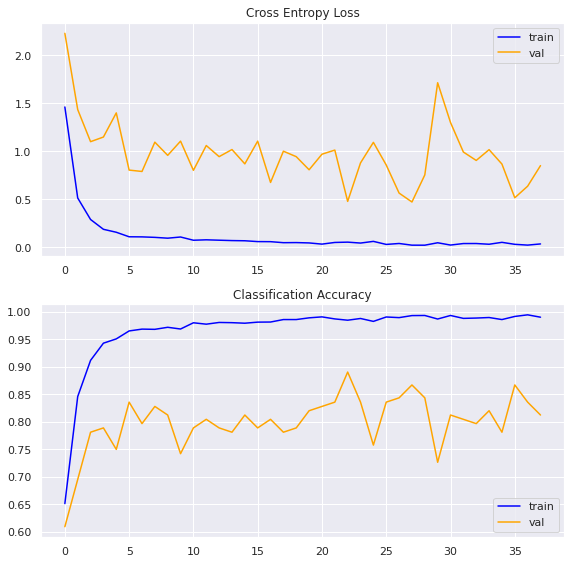


Test set evaluation metrics
10/10 [==============================] - 2s 75ms/step - loss: 0.6508 - accuracy: 0.8602
Loss: 0.65
Accuracy: 0.86


In [217]:
model_report(Xception_MODEL_all,Xception_MODEL_all_history)
Xception_MODEL_all.save('/content/drive/My Drive/Neural_Networks/lab3/models/Xception_all_32.h5')

#Βελτιστοποίηση καλύτερου Μοντελου tl

[' aquarium_fish', ' bed', ' bee', ' beetle', ' bicycle', ' bottle', ' bowl', ' boy', ' bridge', ' bus', ' butterfly', ' camel', ' can', ' castle', ' caterpillar', ' chair', ' chimpanzee', ' clock', ' cloud', ' crab', ' crocodile', ' dinosaur', ' dolphin', ' elephant', ' flatfish', ' fox', ' girl', ' hamster', ' house', ' kangaroo', ' keyboard', ' lawn_mower', ' lion', ' lizard', ' lobster', ' man', ' maple_tree', ' motorcycle', ' mountain', ' mushroom', ' oak_tree', ' orange', ' orchid', ' otter', ' palm_tree', ' pear', ' pickup_truck', ' pine_tree', ' plain', ' poppy', ' porcupine', ' rabbit', ' raccoon', ' ray', ' road', ' rose', ' sea', ' shark', ' shrew', ' skunk', ' snail', ' snake', ' spider', ' squirrel', ' streetcar', ' sunflower', ' sweet_pepper', ' table', ' tank', ' telephone', ' television', ' tiger', ' tractor', ' trout', ' tulip', ' turtle', ' whale', ' willow_tree', ' wolf', ' worm']
6000
Train: X=(34000, 32, 32, 3), y=(34000, 1)
Validation: X=(6000, 32, 32, 3), y=(6000

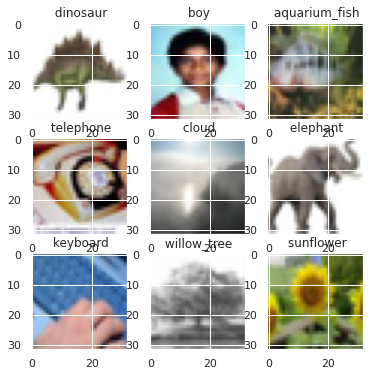

In [43]:
cifar100_classes_url = select_classes_number(80)

team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

print(our_classes)

# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

print(len(x_val))

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

BATCH_SIZE =128
train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object


def train_model(model,name,early_stopping, epochs = 10, steps_per_epoch = 2, verbose=2 , validation_steps = 1):
  
  dir = os.path.join('/content/drive/My Drive/Neural_Networks/lab3/models', name)
  
  if (early_stopping==1):
    tensorboard_callback = tf.keras.callbacks.TensorBoard(dir, histogram_freq=1)
    early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True) 
    history = model.fit(train_ds, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps, callbacks=[tensorboard_callback, early_stopping_callback])
  else:
    history = model.fit(train_ds, epochs=epochs, verbose=2, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps)
  return(history)
  
# print test set evaluation metrics
def model_evaluation(model, evaluation_steps=10):
  print('\nTest set evaluation metrics')
  #loss0,accuracy0,precision0,recall0 = model.evaluate(test_ds, steps = evaluation_steps)
  loss0,accuracy0 = model.evaluate(test_ds, steps = evaluation_steps)
  print("Loss: {:.2f}".format(loss0))
  print("Accuracy: {:.2f}".format(accuracy0))
  #print("Precision: {:.2f}".format(precision0))
  #print("Recall: {:.2f}".format(recall0))

def model_report(model, history, evaluation_steps = 10):
	plt = summarize_diagnostics(history)
	plt.show()
	model_evaluation(model, evaluation_steps)

In [45]:
def init_VGG19_model(summary, trainable):
  VGG16_MODEL=tf.keras.applications.VGG19(input_shape=(32,32,3), include_top=False, weights='imagenet')

  if (trainable == "all"):
    # unfreeze conv layers
    VGG16_MODEL.trainable=True
  elif (trainable == "top"):
    VGG16_MODEL.trainable=False
  else:
    percentage = float(trainable)/100
    nlayers =  len(VGG16_MODEL.layers)
    nfreeze = ceil(nlayers*percentage)

    for layer in VGG16_MODEL.layers[:nfreeze]:
	    layer.trainable = False


  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(len(CIFAR100_LABELS_LIST),activation='softmax')
  model = tf.keras.Sequential([VGG16_MODEL, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.00005), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [46]:
%%time
VGG19_MODEL_all = init_VGG19_model(True, "all")
VGG19_MODEL_all_history = train_model(VGG19_MODEL_all,"VGG19_all_1",True, 400, 40, 10)

80142336/80134624 [==============================] - 1s 0us/step
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               51300     
Total params: 20,075,684
Trainable params: 20,075,684
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
40/40 [==============================] - 13s 235ms/step - loss: 4.8677 - accuracy: 0.0088 - val_loss: 4.5972 - val_accuracy: 0.0078
Epoch 2/400
40/40 [============

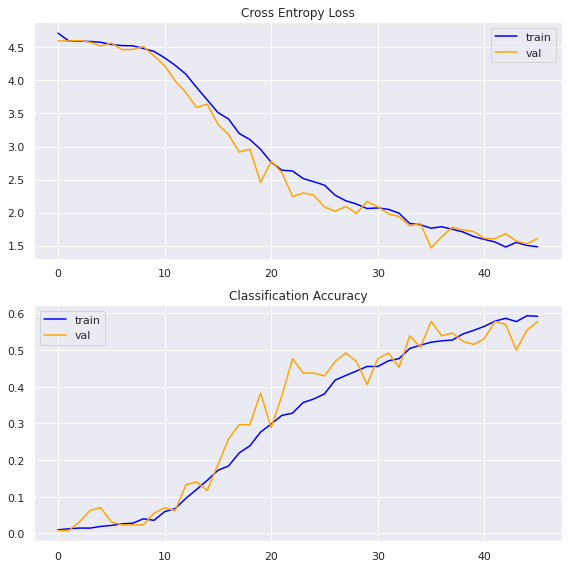


Test set evaluation metrics
10/10 [==============================] - 1s 60ms/step - loss: 1.8178 - accuracy: 0.5078
Loss: 1.82
Accuracy: 0.51


In [47]:
model_report(VGG19_MODEL_all,VGG19_MODEL_all_history)
VGG19_MODEL_all.save('/content/drive/My Drive/Neural_Networks/lab3/models/VGG19_all_32.h5')

In [213]:
def init_Xception_model(summary, trainable):
  Xception=tf.keras.applications.Xception(input_shape=(74,74,3), include_top=False, weights='imagenet')

  if (trainable == "all"):
    # unfreeze conv layers
    Xception.trainable=True
  elif (trainable == "top"):
    Xception.trainable=False
  else:
    percentage = float(trainable)/100
    nlayers =  len(Xception.layers)
    nfreeze = ceil(nlayers*percentage)

    for layer in Xception.layers[:nfreeze]:
	    layer.trainable = False


  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(len(CIFAR100_LABELS_LIST),activation='softmax')
  model = tf.keras.Sequential([Xception, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=tf.keras.optimizers.Nadam( learning_rate=0.001 ), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [214]:
%%time
Xception_MODEL_all = init_Xception_model(True, "all")
Xception_MODEL_all_history = train_model(Xception_MODEL_all,"Xception_all_1",True, 400, 40, 10)

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 3, 3, 2048)        20861480  
_________________________________________________________________
dropout_17 (Dropout)         (None, 3, 3, 2048)        0         
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_121 (Dense)            (None, 100)               204900    
Total params: 21,066,380
Trainable params: 21,011,852
Non-trainable params: 54,528
_________________________________________________________________
Epoch 1/400
40/40 [==============================] - 30s 415ms/step - loss: 2.4121 - accuracy: 0.4769 - val_loss: 1.4625 - val_accuracy: 0.6719
Epoch 2/400
40/40 [==============================] - 15s 378ms/step - loss: 0.6096 - accur

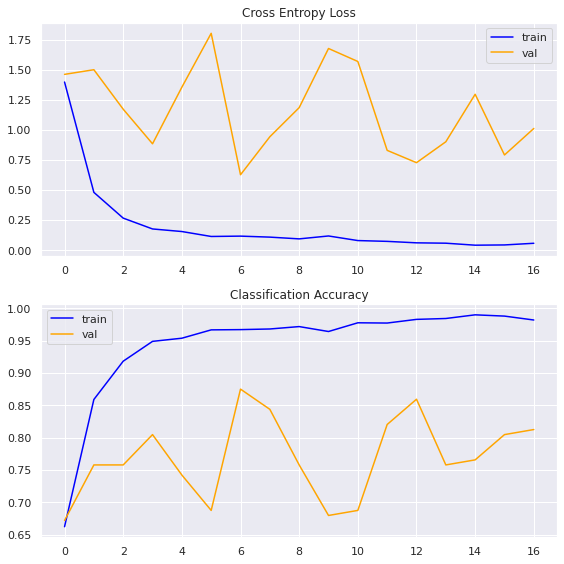


Test set evaluation metrics
10/10 [==============================] - 3s 73ms/step - loss: 0.6827 - accuracy: 0.8469
Loss: 0.68
Accuracy: 0.85


In [215]:
model_report(Xception_MODEL_all,Xception_MODEL_all_history)
Xception_MODEL_all.save('/content/drive/My Drive/Neural_Networks/lab3/models/Xception_all_32.h5')